In [1]:
import numpy as np
import pandas as pd

In [2]:
# sap_data_path = r'C:\Users\ntitov\Downloads\full.csv'
# sap = pd.read_csv(sap_data_path, sep=';')

# sap = sap.loc[sap['Username'] == 'DVM'].copy()
# sap.drop(['Type', 'Username'], axis=1, inplace=True)
# sap['Date'] = sap['Date'].apply(func=lambda x: x.split(' ')[0])
# sap['Date'] = pd.to_datetime(sap['Date'], format="%d/%m/%Y")
# sap.sort_values(['Stock', 'Date'], inplace=True)

# sap_data_path = r'C:\Users\ntitov\Downloads\S&P.csv'
# sap.to_csv(sap_data_path, sep=';', index=False)

In [3]:
# import glob

# frame = pd.DataFrame()
# list_ = []

# path = r'C:\Users\ntitov\Downloads\OUT Zabula'
# allFiles = glob.glob(path + "/*.csv")
# for file_ in allFiles:
#     df = pd.read_csv(file_, sep=';')
#     df['Date'] = df['Date'].apply(func=lambda x: x.split(' ')[0])
#     df['Date'] = pd.to_datetime(df['Date'], format="%d.%m.%Y") 
#     df['File'] = file_
#     list_.append(df)

# frame = pd.concat(list_)

# frame['File'] = frame['File'].apply(func=lambda x: x.split('\\')[-1])
# frame['File'] = frame['File'].apply(func=lambda x: x.split(' ')[0])
# frame['File'] = frame['File'].apply(func=lambda x: x.split('_')[0])
# frame['Stock'] = frame['File']
# frame.drop(['IDselect', 'Type', 'Username', 'File'], axis=1, inplace=True)
# frame.sort_values(['Stock', 'Date'], inplace=True)

# new_data_path = r'C:\Users\ntitov\Downloads\new_data.csv'
# frame.to_csv(new_data_path, sep=';', index=False)

In [4]:
# import glob

# frame = pd.DataFrame()
# list_ = []

# path = r'C:\Users\ntitov\Downloads\NASDAQ'
# allFiles = glob.glob(path + "/*.csv")
# for file_ in allFiles:
#     df = pd.read_csv(file_, sep=',')
#     df['Date'] = df['Date'].apply(func=lambda x: x.split(' ')[0])
#     df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d") 
#     df['File'] = file_
#     list_.append(df)

# frame = pd.concat(list_)

# frame['File'] = frame['File'].apply(func=lambda x: x.split('\\')[-1])
# frame['File'] = frame['File'].apply(func=lambda x: x.split(' ')[0])
# frame['File'] = frame['File'].apply(func=lambda x: x.split('_')[0])
# frame['File'] = frame['File'].apply(func=lambda x: x.split('.')[0])
# frame['Stock'] = frame['File']
# frame.drop(['File', 'Adj Close'], axis=1, inplace=True)
# frame['Volume'] = frame['Volume'].astype('float')
# frame.sort_values(['Stock', 'Date'], inplace=True)

# nasdaq_data_path = r'C:\Users\ntitov\Downloads\nasdaq_data.csv'
# frame.to_csv(nasdaq_data_path, sep=';', index=False)

In [5]:
# sap_data_path = r'C:\Users\ntitov\Downloads\S&P.csv'
# data_sap = pd.read_csv(sap_data_path, sep=';')
# data_sap['Date'] = data_sap['Date'].apply(func=lambda x: x.split(' ')[0])
# data_sap['Date'] = pd.to_datetime(data_sap['Date'], format="%Y-%m-%d")

# data_sap.sort_values(['Stock', 'Date'], inplace=True)

In [6]:
nasdaq_data_path = r'C:\Users\ntitov\Downloads\nasdaq_data.csv'
nasdaq_data = pd.read_csv(nasdaq_data_path, sep=';')
nasdaq_data['Date'] = nasdaq_data['Date'].apply(func=lambda x: x.split(' ')[0])
nasdaq_data['Date'] = pd.to_datetime(nasdaq_data['Date'], format="%Y-%m-%d")

nasdaq_data.sort_values(['Stock', 'Date'], inplace=True)

In [7]:
new_data_path = r'C:\Users\ntitov\Downloads\new_data.csv'
new_data = pd.read_csv(new_data_path, sep=';')
new_data['Date'] = new_data['Date'].apply(func=lambda x: x.split(' ')[0])
new_data['Date'] = pd.to_datetime(new_data['Date'], format="%Y-%m-%d")

new_data.sort_values(['Stock', 'Date'], inplace=True)

In [8]:
# data = pd.concat((data_sap, new_data))
data = new_data

In [9]:
chunks = [data.loc[data['Stock'] == x].copy() for x in data['Stock'].unique()]

In [10]:
chunks = chunks[:60]

In [10]:
from time import gmtime, strftime
import itertools
import random

import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow.contrib.layers as layers

import gym
import gym_trading

import baselines.common.tf_util as U

from baselines import deepq
from baselines.deepq.replay_buffer import ReplayBuffer
from baselines.common.schedules import LinearSchedule

In [11]:
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.set_random_seed(seed)

env = gym.make('trading-v1')
env.initialise_simulator(chunks, min_trade_period=50, max_trade_period=700, train_split=0.7, denom=1, cost=0)#np.log(3))#, feature_engineering=False)

State description: ['-5d_Close', '-3d_Volume', '-5d_Open', 'AD', '-4d_Low', '-21d_Open', '-1d_Low', '100d_High', '-1d_Close', '21d_Volume', '-1d_High', '63d_Volume', '-21d_Volume', '-1d_Volume', '-63d_Volume', '21d_High', 'TEMA-10', '-3d_Open', '-10d_Volume', '-2d_High', '-2d_Low', '-3d_Close', '-2d_Close', '10d_Volume', 'MOM-10', '-2d_Volume', '-4d_High', 'ATR-21', '-5d_Volume', '-4d_Volume', '63d_High', 'MOM-21', '10d_High', '-63d_Open', 'ADX-21', '-3d_High', '-3d_Low', '-5d_Low', 'EMA-10', 'ADX-10', 'EMA-21', '-2d_Open', '-10d_Open', '10d_Low', '-5d_High', '100d_Volume', '100d_Low', '-1d_Open', 'ATR-10', '21d_Low', 'TEMA-21', '-4d_Close', 'Return', '63d_Low', '-4d_Open', 'Open Trade', 'Duration Trade']


In [12]:
def model(inpt, num_actions, scope, reuse=False):
    """This model takes as input an observation and returns values of all actions."""
    with tf.variable_scope(scope, reuse=reuse):
        out = inpt
        out = layers.fully_connected(out, num_outputs=32, activation_fn=tf.nn.relu)
        out = layers.fully_connected(out, num_outputs=64, activation_fn=tf.nn.relu)
        out = layers.fully_connected(out, num_outputs=128, activation_fn=tf.nn.relu)
        out = layers.fully_connected(out, num_outputs=64, activation_fn=tf.nn.relu)
        out = layers.fully_connected(out, num_outputs=32, activation_fn=tf.nn.relu)
        out = layers.fully_connected(out, num_outputs=16, activation_fn=tf.nn.relu)
        out = layers.fully_connected(out, num_outputs=num_actions, activation_fn=None)
        return out

In [13]:
def run_test(env, act, episodes=1):
    env.sim._switch_train_test(train=False)
    obs = env.reset()
    
    actions_history = []
    journals = []
    if isinstance(act, (set, tuple, list, np.ndarray)):
        act = iter(act)
        act_iter = True
    else:
        act_iter = False
    
    if act == 'random_agent':
        act = lambda _: env.action_space.sample()
    if act == 'buy_and_hold':
        buy_and_hold = True
    else:
        buy_and_hold = False
    
    for _ in range(episodes):
        if buy_and_hold:
            act_iter = True
            act = np.zeros((len(env.sim.states) - 1, 1))
            act[0] = 1
            act[-1] = 3
            act = iter(act)

        done = False
        while not done:
            if not act_iter:
                action = act(obs[None])
            else:
                try:
                    action = next(act)
                except IndexError:
                    action = next(act)[0]
            actions_history.append(action)
            obs, reward, done, info = env.step(action)

        journal = env.generate_summary_stats(train=False,
                                             render_matplotlib=False,
                                             render_plotly=True,
                                             print_details=False)
        journals.append(journal)
        env.reset()

    return actions_history, journals

Instructions for updating:
Use `argmax` instead


C:\Miniconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Miniconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-------------------------------------
Steps                     | 332
Episodes                  | 1
---
Mean episode reward       | nan
Total operations          | 5
Avg duration trades       | 55.6
Total profit              | 1.0
Avg profit per trade      | 0.115
-------------------------------------
Steps                     | 2734
Episodes                  | 2
---
Mean episode reward       | 0.7
Total operations          | 42
Avg duration trades       | 55.0
Total profit              | -0.0
Avg profit per trade      | -0.005
-------------------------------------
Steps                     | 3390
Episodes                  | 3
---
Mean episode reward       | 0.2
Total operations          | 11
Avg duration trades       | 54.36
Total profit              | 1.0
Avg profit per trade      | 0.059
-------------------------------------
Steps                     | 5781
Episodes                  | 4
---
Mean episode reward       | 0.4
Total operations          | 42
Avg duration trades       | 54

-------------------------------------
Steps                     | 68570
Episodes                  | 32
---
Mean episode reward       | -0.2
Total operations          | 37
Avg duration trades       | 61.24
Total profit              | -1.0
Avg profit per trade      | -0.016
-------------------------------------
Steps                     | 70961
Episodes                  | 33
---
Mean episode reward       | -0.2
Total operations          | 37
Avg duration trades       | 61.78
Total profit              | -2.0
Avg profit per trade      | -0.043
-------------------------------------
Steps                     | 73338
Episodes                  | 34
---
Mean episode reward       | -0.3
Total operations          | 35
Avg duration trades       | 62.54
Total profit              | -0.0
Avg profit per trade      | -0.001
-------------------------------------
Steps                     | 73649
Episodes                  | 35
---
Mean episode reward       | -0.2
Total operations          | 3
Avg duratio

-------------------------------------
Steps                     | 136239
Episodes                  | 63
---
Mean episode reward       | -0.2
Total operations          | 33
Avg duration trades       | 67.3
Total profit              | -0.0
Avg profit per trade      | -0.006
-------------------------------------
Steps                     | 138645
Episodes                  | 64
---
Mean episode reward       | -0.2
Total operations          | 31
Avg duration trades       | 72.1
Total profit              | -2.0
Avg profit per trade      | -0.057
-------------------------------------
Steps                     | 141036
Episodes                  | 65
---
Mean episode reward       | -0.2
Total operations          | 30
Avg duration trades       | 70.27
Total profit              | -0.0
Avg profit per trade      | -0.001
-------------------------------------
Steps                     | 143455
Episodes                  | 66
---
Mean episode reward       | -0.2
Total operations          | 35
Avg dura

-------------------------------------
Steps                     | 205792
Episodes                  | 94
---
Mean episode reward       | -0.1
Total operations          | 14
Avg duration trades       | 60.0
Total profit              | -0.0
Avg profit per trade      | -0.007
-------------------------------------
Steps                     | 208184
Episodes                  | 95
---
Mean episode reward       | -0.1
Total operations          | 30
Avg duration trades       | 72.13
Total profit              | 1.0
Avg profit per trade      | 0.018
-------------------------------------
Steps                     | 210575
Episodes                  | 96
---
Mean episode reward       | -0.1
Total operations          | 31
Avg duration trades       | 72.65
Total profit              | 1.0
Avg profit per trade      | 0.029
-------------------------------------
Steps                     | 212966
Episodes                  | 97
---
Mean episode reward       | -0.1
Total operations          | 29
Avg duratio

-------------------------------------
Steps                     | 267973
Episodes                  | 124
---
Mean episode reward       | -0.1
Total operations          | 32
Avg duration trades       | 67.91
Total profit              | 0.0
Avg profit per trade      | 0.014
-------------------------------------
Steps                     | 270364
Episodes                  | 125
---
Mean episode reward       | -0.1
Total operations          | 29
Avg duration trades       | 74.28
Total profit              | -0.0
Avg profit per trade      | -0.0
-------------------------------------
Steps                     | 272788
Episodes                  | 126
---
Mean episode reward       | -0.1
Total operations          | 30
Avg duration trades       | 71.77
Total profit              | 0.0
Avg profit per trade      | 0.007
-------------------------------------
Steps                     | 275151
Episodes                  | 127
---
Mean episode reward       | -0.0
Total operations          | 36
Avg dura

-------------------------------------
Steps                     | 329761
Episodes                  | 154
---
Mean episode reward       | 0.0
Total operations          | 31
Avg duration trades       | 68.26
Total profit              | -1.0
Avg profit per trade      | -0.024
-------------------------------------
Steps                     | 332152
Episodes                  | 155
---
Mean episode reward       | 0.0
Total operations          | 32
Avg duration trades       | 66.78
Total profit              | 1.0
Avg profit per trade      | 0.021
-------------------------------------
Steps                     | 334543
Episodes                  | 156
---
Mean episode reward       | 0.0
Total operations          | 31
Avg duration trades       | 72.58
Total profit              | 1.0
Avg profit per trade      | 0.027
-------------------------------------
Steps                     | 336919
Episodes                  | 157
---
Mean episode reward       | 0.1
Total operations          | 28
Avg durati

-------------------------------------
Steps                     | 399913
Episodes                  | 185
---
Mean episode reward       | -0.0
Total operations          | 27
Avg duration trades       | 81.26
Total profit              | 2.0
Avg profit per trade      | 0.062
-------------------------------------
Steps                     | 402339
Episodes                  | 186
---
Mean episode reward       | 0.0
Total operations          | 24
Avg duration trades       | 91.75
Total profit              | -1.0
Avg profit per trade      | -0.034
-------------------------------------
Steps                     | 404716
Episodes                  | 187
---
Mean episode reward       | 0.0
Total operations          | 27
Avg duration trades       | 79.48
Total profit              | -1.0
Avg profit per trade      | -0.03
-------------------------------------
Steps                     | 407061
Episodes                  | 188
---
Mean episode reward       | -0.0
Total operations          | 28
Avg dur

-------------------------------------
Steps                     | 468557
Episodes                  | 216
---
Mean episode reward       | 0.1
Total operations          | 4
Avg duration trades       | 68.5
Total profit              | -0.0
Avg profit per trade      | -0.02
-------------------------------------
Steps                     | 470984
Episodes                  | 217
---
Mean episode reward       | 0.1
Total operations          | 26
Avg duration trades       | 82.12
Total profit              | 1.0
Avg profit per trade      | 0.028
-------------------------------------
Steps                     | 473401
Episodes                  | 218
---
Mean episode reward       | 0.1
Total operations          | 28
Avg duration trades       | 80.82
Total profit              | 1.0
Avg profit per trade      | 0.022
-------------------------------------
Steps                     | 475802
Episodes                  | 219
---
Mean episode reward       | 0.1
Total operations          | 30
Avg duration 

-------------------------------------
Steps                     | 538569
Episodes                  | 246
---
Mean episode reward       | -0.0
Total operations          | 30
Avg duration trades       | 73.57
Total profit              | 1.0
Avg profit per trade      | 0.023
-------------------------------------
Steps                     | 540946
Episodes                  | 247
---
Mean episode reward       | -0.0
Total operations          | 29
Avg duration trades       | 77.21
Total profit              | 1.0
Avg profit per trade      | 0.027
-------------------------------------
Steps                     | 543337
Episodes                  | 248
---
Mean episode reward       | -0.0
Total operations          | 29
Avg duration trades       | 73.03
Total profit              | 0.0
Avg profit per trade      | 0.005
-------------------------------------
Steps                     | 545728
Episodes                  | 249
---
Mean episode reward       | -0.0
Total operations          | 25
Avg dura

-------------------------------------
Steps                     | 605301
Episodes                  | 277
---
Mean episode reward       | -0.1
Total operations          | 4
Avg duration trades       | 144.0
Total profit              | 0.0
Avg profit per trade      | 0.057
-------------------------------------
Steps                     | 607692
Episodes                  | 278
---
Mean episode reward       | -0.1
Total operations          | 27
Avg duration trades       | 78.33
Total profit              | -0.0
Avg profit per trade      | -0.01
-------------------------------------
Steps                     | 610118
Episodes                  | 279
---
Mean episode reward       | -0.1
Total operations          | 30
Avg duration trades       | 74.13
Total profit              | -1.0
Avg profit per trade      | -0.051
-------------------------------------
Steps                     | 612509
Episodes                  | 280
---
Mean episode reward       | -0.1
Total operations          | 23
Avg du

-------------------------------------
Steps                     | 669799
Episodes                  | 307
---
Mean episode reward       | -0.2
Total operations          | 9
Avg duration trades       | 75.56
Total profit              | -0.0
Avg profit per trade      | -0.048
-------------------------------------
Steps                     | 672175
Episodes                  | 308
---
Mean episode reward       | -0.2
Total operations          | 24
Avg duration trades       | 86.21
Total profit              | -1.0
Avg profit per trade      | -0.062
-------------------------------------
Steps                     | 674551
Episodes                  | 309
---
Mean episode reward       | -0.2
Total operations          | 23
Avg duration trades       | 90.43
Total profit              | -1.0
Avg profit per trade      | -0.033
-------------------------------------
Steps                     | 676928
Episodes                  | 310
---
Mean episode reward       | -0.3
Total operations          | 16
Avg

-------------------------------------
Steps                     | 737661
Episodes                  | 337
---
Mean episode reward       | -0.2
Total operations          | 27
Avg duration trades       | 81.41
Total profit              | 0.0
Avg profit per trade      | 0.016
-------------------------------------
Steps                     | 740066
Episodes                  | 338
---
Mean episode reward       | -0.2
Total operations          | 29
Avg duration trades       | 76.62
Total profit              | -1.0
Avg profit per trade      | -0.039
-------------------------------------
Steps                     | 742428
Episodes                  | 339
---
Mean episode reward       | -0.2
Total operations          | 28
Avg duration trades       | 78.07
Total profit              | -0.0
Avg profit per trade      | -0.002
-------------------------------------
Steps                     | 744834
Episodes                  | 340
---
Mean episode reward       | -0.2
Total operations          | 20
Avg 

-------------------------------------
Steps                     | 801027
Episodes                  | 368
---
No trades were taken
-------------------------------------
Steps                     | 803419
Episodes                  | 369
---
Mean episode reward       | -0.1
Total operations          | 31
Avg duration trades       | 71.87
Total profit              | -1.0
Avg profit per trade      | -0.029
-------------------------------------
Steps                     | 805796
Episodes                  | 370
---
Mean episode reward       | -0.1
Total operations          | 19
Avg duration trades       | 117.47
Total profit              | -0.0
Avg profit per trade      | -0.005
-------------------------------------
Steps                     | 808172
Episodes                  | 371
---
Mean episode reward       | -0.1
Total operations          | 20
Avg duration trades       | 111.55
Total profit              | -1.0
Avg profit per trade      | -0.054
-------------------------------------
Steps

-------------------------------------
Steps                     | 869403
Episodes                  | 399
---
Mean episode reward       | -0.2
Total operations          | 34
Avg duration trades       | 65.32
Total profit              | -0.0
Avg profit per trade      | -0.014
-------------------------------------
Steps                     | 871067
Episodes                  | 400
---
Mean episode reward       | -0.2
Total operations          | 24
Avg duration trades       | 61.29
Total profit              | -0.0
Avg profit per trade      | -0.018
-------------------------------------
Steps                     | 873492
Episodes                  | 401
---
Mean episode reward       | -0.2
Total operations          | 29
Avg duration trades       | 74.03
Total profit              | -1.0
Avg profit per trade      | -0.035
-------------------------------------
Steps                     | 875067
Episodes                  | 402
---
Mean episode reward       | -0.2
Total operations          | 16
Av

-------------------------------------
Steps                     | 930917
Episodes                  | 429
---
Mean episode reward       | -0.0
Total operations          | 36
Avg duration trades       | 62.56
Total profit              | 1.0
Avg profit per trade      | 0.029
-------------------------------------
Steps                     | 933335
Episodes                  | 430
---
Mean episode reward       | -0.0
Total operations          | 25
Avg duration trades       | 85.6
Total profit              | 0.0
Avg profit per trade      | 0.013
-------------------------------------
Steps                     | 935761
Episodes                  | 431
---
Mean episode reward       | -0.0
Total operations          | 26
Avg duration trades       | 85.12
Total profit              | -0.0
Avg profit per trade      | -0.003
-------------------------------------
Steps                     | 938140
Episodes                  | 432
---
Mean episode reward       | -0.0
Total operations          | 28
Avg dur

-------------------------------------
Steps                     | 998071
Episodes                  | 459
---
Mean episode reward       | -0.1
Total operations          | 29
Avg duration trades       | 74.76
Total profit              | 1.0
Avg profit per trade      | 0.022
-------------------------------------
Steps                     | 998836
Episodes                  | 460
---
Mean episode reward       | -0.1
Total operations          | 12
Avg duration trades       | 59.67
Total profit              | 1.0
Avg profit per trade      | 0.063
-------------------------------------
Steps                     | 1001213
Episodes                  | 461
---
Mean episode reward       | -0.1
Total operations          | 31
Avg duration trades       | 69.61
Total profit              | -1.0
Avg profit per trade      | -0.03
-------------------------------------
Steps                     | 1003615
Episodes                  | 462
---
Mean episode reward       | -0.1
Total operations          | 27
Avg d

-------------------------------------
Steps                     | 1065758
Episodes                  | 489
---
Mean episode reward       | -0.0
Total operations          | 25
Avg duration trades       | 81.24
Total profit              | -0.0
Avg profit per trade      | -0.011
-------------------------------------
Steps                     | 1068184
Episodes                  | 490
---
Mean episode reward       | -0.0
Total operations          | 24
Avg duration trades       | 89.75
Total profit              | -1.0
Avg profit per trade      | -0.038
-------------------------------------
Steps                     | 1070585
Episodes                  | 491
---
Mean episode reward       | -0.0
Total operations          | 29
Avg duration trades       | 76.97
Total profit              | 3.0
Avg profit per trade      | 0.094
-------------------------------------
Steps                     | 1072976
Episodes                  | 492
---
Mean episode reward       | -0.0
Total operations          | 26


-------------------------------------
Steps                     | 1131107
Episodes                  | 519
---
Mean episode reward       | 0.0
Total operations          | 24
Avg duration trades       | 83.71
Total profit              | 1.0
Avg profit per trade      | 0.045
-------------------------------------
Steps                     | 1133534
Episodes                  | 520
---
Mean episode reward       | 0.0
Total operations          | 23
Avg duration trades       | 96.65
Total profit              | 1.0
Avg profit per trade      | 0.038
-------------------------------------
Steps                     | 1135230
Episodes                  | 521
---
Mean episode reward       | 0.0
Total operations          | 19
Avg duration trades       | 81.21
Total profit              | 0.0
Avg profit per trade      | 0.018
-------------------------------------
Steps                     | 1137657
Episodes                  | 522
---
Mean episode reward       | 0.0
Total operations          | 25
Avg dura

-------------------------------------
Steps                     | 1195101
Episodes                  | 549
---
Mean episode reward       | 0.0
Total operations          | 28
Avg duration trades       | 80.04
Total profit              | 0.0
Avg profit per trade      | 0.001
-------------------------------------
Steps                     | 1197492
Episodes                  | 550
---
Mean episode reward       | 0.0
Total operations          | 32
Avg duration trades       | 69.22
Total profit              | 1.0
Avg profit per trade      | 0.021
-------------------------------------
Steps                     | 1199895
Episodes                  | 551
---
Mean episode reward       | 0.0
Total operations          | 28
Avg duration trades       | 78.89
Total profit              | 3.0
Avg profit per trade      | 0.091
-------------------------------------
Steps                     | 1202297
Episodes                  | 552
---
Mean episode reward       | 0.1
Total operations          | 29
Avg dura

-------------------------------------
Steps                     | 1259211
Episodes                  | 580
---
Mean episode reward       | 0.1
Total operations          | 23
Avg duration trades       | 95.43
Total profit              | 0.0
Avg profit per trade      | 0.016
-------------------------------------
Steps                     | 1261616
Episodes                  | 581
---
Mean episode reward       | 0.1
Total operations          | 22
Avg duration trades       | 99.41
Total profit              | -0.0
Avg profit per trade      | -0.005
-------------------------------------
Steps                     | 1264021
Episodes                  | 582
---
Mean episode reward       | 0.1
Total operations          | 21
Avg duration trades       | 101.67
Total profit              | -2.0
Avg profit per trade      | -0.08
-------------------------------------
Steps                     | 1266398
Episodes                  | 583
---
Mean episode reward       | 0.1
Total operations          | 29
Avg 

-------------------------------------
Steps                     | 1325654
Episodes                  | 610
---
Mean episode reward       | 0.0
Total operations          | 11
Avg duration trades       | 67.27
Total profit              | 0.0
Avg profit per trade      | 0.029
-------------------------------------
Steps                     | 1328081
Episodes                  | 611
---
Mean episode reward       | 0.0
Total operations          | 28
Avg duration trades       | 76.75
Total profit              | 1.0
Avg profit per trade      | 0.032
-------------------------------------
Steps                     | 1330090
Episodes                  | 612
---
Mean episode reward       | 0.0
Total operations          | 22
Avg duration trades       | 84.09
Total profit              | -1.0
Avg profit per trade      | -0.031
-------------------------------------
Steps                     | 1332482
Episodes                  | 613
---
Mean episode reward       | 0.0
Total operations          | 15
Avg du

-------------------------------------
Steps                     | 1393313
Episodes                  | 640
---
Mean episode reward       | -0.1
Total operations          | 10
Avg duration trades       | 223.8
Total profit              | -2.0
Avg profit per trade      | -0.158
-------------------------------------
Steps                     | 1395689
Episodes                  | 641
---
Mean episode reward       | -0.1
Total operations          | 20
Avg duration trades       | 111.8
Total profit              | 0.0
Avg profit per trade      | 0.016
-------------------------------------
Steps                     | 1398113
Episodes                  | 642
---
Mean episode reward       | -0.1
Total operations          | 26
Avg duration trades       | 84.46
Total profit              | 0.0
Avg profit per trade      | 0.009
-------------------------------------
Steps                     | 1400538
Episodes                  | 643
---
Mean episode reward       | -0.1
Total operations          | 22
Av

-------------------------------------
Steps                     | 1463244
Episodes                  | 670
---
Mean episode reward       | -0.2
Total operations          | 29
Avg duration trades       | 75.0
Total profit              | 1.0
Avg profit per trade      | 0.024
-------------------------------------
Steps                     | 1465650
Episodes                  | 671
---
Mean episode reward       | -0.2
Total operations          | 24
Avg duration trades       | 93.75
Total profit              | -1.0
Avg profit per trade      | -0.034
-------------------------------------
Steps                     | 1467817
Episodes                  | 672
---
Mean episode reward       | -0.2
Total operations          | 26
Avg duration trades       | 74.38
Total profit              | -1.0
Avg profit per trade      | -0.043
-------------------------------------
Steps                     | 1470208
Episodes                  | 673
---
Mean episode reward       | -0.2
Total operations          | 31
A

-------------------------------------
Steps                     | 1525740
Episodes                  | 700
---
Mean episode reward       | -0.2
Total operations          | 30
Avg duration trades       | 71.6
Total profit              | -0.0
Avg profit per trade      | -0.002
-------------------------------------
Steps                     | 1528166
Episodes                  | 701
---
Mean episode reward       | -0.2
Total operations          | 21
Avg duration trades       | 111.76
Total profit              | -2.0
Avg profit per trade      | -0.091
-------------------------------------
Steps                     | 1530591
Episodes                  | 702
---
Mean episode reward       | -0.2
Total operations          | 30
Avg duration trades       | 74.97
Total profit              | -1.0
Avg profit per trade      | -0.042
-------------------------------------
Steps                     | 1532982
Episodes                  | 703
---
Mean episode reward       | -0.2
Total operations          | 2

-------------------------------------
Steps                     | 1592071
Episodes                  | 730
---
Mean episode reward       | -0.1
Total operations          | 25
Avg duration trades       | 84.72
Total profit              | 0.0
Avg profit per trade      | 0.016
-------------------------------------
Steps                     | 1594473
Episodes                  | 731
---
Mean episode reward       | -0.1
Total operations          | 18
Avg duration trades       | 131.39
Total profit              | -1.0
Avg profit per trade      | -0.042
-------------------------------------
Steps                     | 1596899
Episodes                  | 732
---
Mean episode reward       | -0.1
Total operations          | 37
Avg duration trades       | 62.76
Total profit              | -0.0
Avg profit per trade      | -0.003
-------------------------------------
Steps                     | 1599291
Episodes                  | 733
---
Mean episode reward       | -0.1
Total operations          | 34

-------------------------------------
Steps                     | 1659984
Episodes                  | 760
---
Mean episode reward       | -0.0
Total operations          | 33
Avg duration trades       | 66.15
Total profit              | 1.0
Avg profit per trade      | 0.046
-------------------------------------
Steps                     | 1660893
Episodes                  | 761
---
Mean episode reward       | -0.0
Total operations          | 17
Avg duration trades       | 50.0
Total profit              | -0.0
Avg profit per trade      | -0.01
-------------------------------------
Steps                     | 1661703
Episodes                  | 762
---
Mean episode reward       | -0.0
Total operations          | 9
Avg duration trades       | 81.78
Total profit              | -1.0
Avg profit per trade      | -0.07
-------------------------------------
Steps                     | 1664080
Episodes                  | 763
---
Mean episode reward       | 0.0
Total operations          | 37
Avg d

-------------------------------------
Steps                     | 1719147
Episodes                  | 790
---
Mean episode reward       | 0.1
Total operations          | 35
Avg duration trades       | 66.2
Total profit              | -1.0
Avg profit per trade      | -0.061
-------------------------------------
Steps                     | 1721526
Episodes                  | 791
---
Mean episode reward       | 0.1
Total operations          | 11
Avg duration trades       | 203.64
Total profit              | 0.0
Avg profit per trade      | 0.028
-------------------------------------
Steps                     | 1723888
Episodes                  | 792
---
Mean episode reward       | 0.1
Total operations          | 25
Avg duration trades       | 86.48
Total profit              | 0.0
Avg profit per trade      | 0.013
-------------------------------------
Steps                     | 1726265
Episodes                  | 793
---
Mean episode reward       | 0.1
Total operations          | 27
Avg du

-------------------------------------
Steps                     | 1785395
Episodes                  | 820
---
Mean episode reward       | 0.2
Total operations          | 13
Avg duration trades       | 152.62
Total profit              | 1.0
Avg profit per trade      | 0.045
-------------------------------------
Steps                     | 1786718
Episodes                  | 821
---
Mean episode reward       | 0.2
Total operations          | 16
Avg duration trades       | 74.5
Total profit              | -1.0
Avg profit per trade      | -0.082
-------------------------------------
Steps                     | 1789120
Episodes                  | 822
---
Mean episode reward       | 0.2
Total operations          | 18
Avg duration trades       | 128.44
Total profit              | 2.0
Avg profit per trade      | 0.087
-------------------------------------
Steps                     | 1791547
Episodes                  | 823
---
Mean episode reward       | 0.2
Total operations          | 14
Avg d

-------------------------------------
Steps                     | 1848468
Episodes                  | 850
---
Mean episode reward       | 0.1
Total operations          | 25
Avg duration trades       | 80.12
Total profit              | 2.0
Avg profit per trade      | 0.062
-------------------------------------
Steps                     | 1850895
Episodes                  | 851
---
Mean episode reward       | 0.1
Total operations          | 29
Avg duration trades       | 75.48
Total profit              | 0.0
Avg profit per trade      | 0.013
-------------------------------------
Steps                     | 1853301
Episodes                  | 852
---
Mean episode reward       | 0.1
Total operations          | 29
Avg duration trades       | 74.86
Total profit              | 0.0
Avg profit per trade      | 0.011
-------------------------------------
Steps                     | 1855728
Episodes                  | 853
---
Mean episode reward       | 0.1
Total operations          | 26
Avg dura

-------------------------------------
Steps                     | 1913979
Episodes                  | 880
---
Mean episode reward       | 0.1
Total operations          | 24
Avg duration trades       | 96.67
Total profit              | 1.0
Avg profit per trade      | 0.024
-------------------------------------
Steps                     | 1914446
Episodes                  | 881
---
Mean episode reward       | 0.1
Total operations          | 4
Avg duration trades       | 97.25
Total profit              | -0.0
Avg profit per trade      | -0.01
-------------------------------------
Steps                     | 1916837
Episodes                  | 882
---
Mean episode reward       | 0.1
Total operations          | 12
Avg duration trades       | 197.75
Total profit              | 0.0
Avg profit per trade      | 0.018
-------------------------------------
Steps                     | 1919251
Episodes                  | 883
---
Mean episode reward       | 0.1
Total operations          | 16
Avg dur

-------------------------------------
Steps                     | 1982327
Episodes                  | 910
---
Mean episode reward       | 0.1
Total operations          | 14
Avg duration trades       | 86.21
Total profit              | -3.0
Avg profit per trade      | -0.229
-------------------------------------
Steps                     | 1984700
Episodes                  | 911
---
Mean episode reward       | 0.0
Total operations          | 24
Avg duration trades       | 94.88
Total profit              | -1.0
Avg profit per trade      | -0.026
-------------------------------------
Steps                     | 1987118
Episodes                  | 912
---
Mean episode reward       | 0.0
Total operations          | 23
Avg duration trades       | 98.87
Total profit              | -0.0
Avg profit per trade      | -0.013
-------------------------------------
Steps                     | 1989509
Episodes                  | 913
---
Mean episode reward       | 0.0
Total operations          | 11
Av

-------------------------------------
Steps                     | 2047957
Episodes                  | 940
---
Mean episode reward       | -0.1
Total operations          | 19
Avg duration trades       | 109.0
Total profit              | 1.0
Avg profit per trade      | 0.052
-------------------------------------
Steps                     | 2050384
Episodes                  | 941
---
Mean episode reward       | -0.1
Total operations          | 28
Avg duration trades       | 80.46
Total profit              | 0.0
Avg profit per trade      | 0.011
-------------------------------------
Steps                     | 2052810
Episodes                  | 942
---
Mean episode reward       | -0.1
Total operations          | 19
Avg duration trades       | 118.68
Total profit              | 0.0
Avg profit per trade      | 0.019
-------------------------------------
Steps                     | 2055186
Episodes                  | 943
---
Mean episode reward       | -0.1
Total operations          | 24
Avg

-------------------------------------
Steps                     | 2112612
Episodes                  | 970
---
Mean episode reward       | -0.1
Total operations          | 13
Avg duration trades       | 140.92
Total profit              | 0.0
Avg profit per trade      | 0.026
-------------------------------------
Steps                     | 2112673
Episodes                  | 971
---
No trades were taken
-------------------------------------
Steps                     | 2112919
Episodes                  | 972
---
Mean episode reward       | -0.1
Total operations          | 3
Avg duration trades       | 62.33
Total profit              | 0.0
Avg profit per trade      | 0.02
-------------------------------------
Steps                     | 2115324
Episodes                  | 973
---
Mean episode reward       | -0.1
Total operations          | 24
Avg duration trades       | 88.54
Total profit              | -1.0
Avg profit per trade      | -0.022
-------------------------------------
Steps   

-------------------------------------
Steps                     | 2176741
Episodes                  | 1001
---
Mean episode reward       | -0.1
Total operations          | 26
Avg duration trades       | 89.19
Total profit              | -0.0
Avg profit per trade      | -0.015
-------------------------------------
Steps                     | 2179132
Episodes                  | 1002
---
Mean episode reward       | -0.1
Total operations          | 25
Avg duration trades       | 88.44
Total profit              | -0.0
Avg profit per trade      | -0.0
-------------------------------------
Steps                     | 2180817
Episodes                  | 1003
---
Mean episode reward       | -0.1
Total operations          | 14
Avg duration trades       | 97.5
Total profit              | 0.0
Avg profit per trade      | 0.032
-------------------------------------
Steps                     | 2183242
Episodes                  | 1004
---
Mean episode reward       | -0.1
Total operations          | 9


-------------------------------------
Steps                     | 2242810
Episodes                  | 1031
---
Mean episode reward       | 0.1
Total operations          | 22
Avg duration trades       | 89.05
Total profit              | -1.0
Avg profit per trade      | -0.031
-------------------------------------
Steps                     | 2245186
Episodes                  | 1032
---
Mean episode reward       | 0.1
Total operations          | 30
Avg duration trades       | 76.13
Total profit              | -1.0
Avg profit per trade      | -0.045
-------------------------------------
Steps                     | 2245839
Episodes                  | 1033
---
Mean episode reward       | 0.1
Total operations          | 9
Avg duration trades       | 61.22
Total profit              | -0.0
Avg profit per trade      | -0.037
-------------------------------------
Steps                     | 2248241
Episodes                  | 1034
---
Mean episode reward       | 0.0
Total operations          | 32

-------------------------------------
Steps                     | 2310866
Episodes                  | 1061
---
Mean episode reward       | -0.0
Total operations          | 20
Avg duration trades       | 108.1
Total profit              | -1.0
Avg profit per trade      | -0.033
-------------------------------------
Steps                     | 2313245
Episodes                  | 1062
---
Mean episode reward       | 0.0
Total operations          | 26
Avg duration trades       | 84.31
Total profit              | -1.0
Avg profit per trade      | -0.044
-------------------------------------
Steps                     | 2314780
Episodes                  | 1063
---
Mean episode reward       | -0.0
Total operations          | 15
Avg duration trades       | 94.87
Total profit              | -0.0
Avg profit per trade      | -0.028
-------------------------------------
Steps                     | 2317171
Episodes                  | 1064
---
Mean episode reward       | -0.0
Total operations          

-------------------------------------
Steps                     | 2380571
Episodes                  | 1091
---
Mean episode reward       | -0.1
Total operations          | 25
Avg duration trades       | 88.08
Total profit              | -0.0
Avg profit per trade      | -0.019
-------------------------------------
Steps                     | 2382962
Episodes                  | 1092
---
Mean episode reward       | -0.1
Total operations          | 30
Avg duration trades       | 76.77
Total profit              | 0.0
Avg profit per trade      | 0.001
-------------------------------------
Steps                     | 2385353
Episodes                  | 1093
---
Mean episode reward       | -0.1
Total operations          | 22
Avg duration trades       | 98.77
Total profit              | 1.0
Avg profit per trade      | 0.028
-------------------------------------
Steps                     | 2387730
Episodes                  | 1094
---
Mean episode reward       | -0.1
Total operations          | 3

-------------------------------------
Steps                     | 2445686
Episodes                  | 1122
---
Mean episode reward       | -0.1
Total operations          | 22
Avg duration trades       | 88.0
Total profit              | 0.0
Avg profit per trade      | 0.018
-------------------------------------
Steps                     | 2448113
Episodes                  | 1123
---
Mean episode reward       | -0.1
Total operations          | 29
Avg duration trades       | 74.79
Total profit              | 0.0
Avg profit per trade      | 0.004
-------------------------------------
Steps                     | 2450504
Episodes                  | 1124
---
Mean episode reward       | -0.1
Total operations          | 27
Avg duration trades       | 85.22
Total profit              | -1.0
Avg profit per trade      | -0.033
-------------------------------------
Steps                     | 2452907
Episodes                  | 1125
---
Mean episode reward       | -0.1
Total operations          | 29

-------------------------------------
Steps                     | 2512022
Episodes                  | 1152
---
Mean episode reward       | -0.1
Total operations          | 25
Avg duration trades       | 84.2
Total profit              | 0.0
Avg profit per trade      | 0.01
-------------------------------------
Steps                     | 2514449
Episodes                  | 1153
---
Mean episode reward       | -0.1
Total operations          | 21
Avg duration trades       | 101.33
Total profit              | 1.0
Avg profit per trade      | 0.03
-------------------------------------
Steps                     | 2515457
Episodes                  | 1154
---
Mean episode reward       | -0.1
Total operations          | 9
Avg duration trades       | 87.44
Total profit              | 0.0
Avg profit per trade      | 0.034
-------------------------------------
Steps                     | 2517849
Episodes                  | 1155
---
Mean episode reward       | -0.1
Total operations          | 22
Avg

-------------------------------------
Steps                     | 2576784
Episodes                  | 1182
---
Mean episode reward       | -0.0
Total operations          | 23
Avg duration trades       | 86.3
Total profit              | 0.0
Avg profit per trade      | 0.014
-------------------------------------
Steps                     | 2579210
Episodes                  | 1183
---
Mean episode reward       | -0.0
Total operations          | 22
Avg duration trades       | 100.14
Total profit              | -0.0
Avg profit per trade      | -0.001
-------------------------------------
Steps                     | 2581601
Episodes                  | 1184
---
Mean episode reward       | 0.0
Total operations          | 23
Avg duration trades       | 95.22
Total profit              | 1.0
Avg profit per trade      | 0.035
-------------------------------------
Steps                     | 2583993
Episodes                  | 1185
---
Mean episode reward       | 0.0
Total operations          | 19


-------------------------------------
Steps                     | 2638984
Episodes                  | 1212
---
Mean episode reward       | 0.1
Total operations          | 23
Avg duration trades       | 93.61
Total profit              | -1.0
Avg profit per trade      | -0.035
-------------------------------------
Steps                     | 2641347
Episodes                  | 1213
---
Mean episode reward       | 0.1
Total operations          | 31
Avg duration trades       | 63.68
Total profit              | 0.0
Avg profit per trade      | 0.015
-------------------------------------
Steps                     | 2642992
Episodes                  | 1214
---
Mean episode reward       | 0.1
Total operations          | 14
Avg duration trades       | 108.64
Total profit              | -1.0
Avg profit per trade      | -0.04
-------------------------------------
Steps                     | 2645370
Episodes                  | 1215
---
Mean episode reward       | 0.1
Total operations          | 21


-------------------------------------
Steps                     | 2704303
Episodes                  | 1242
---
Mean episode reward       | 0.1
Total operations          | 26
Avg duration trades       | 85.81
Total profit              | 0.0
Avg profit per trade      | 0.019
-------------------------------------
Steps                     | 2706705
Episodes                  | 1243
---
Mean episode reward       | 0.2
Total operations          | 26
Avg duration trades       | 86.0
Total profit              | 0.0
Avg profit per trade      | 0.018
-------------------------------------
Steps                     | 2709110
Episodes                  | 1244
---
Mean episode reward       | 0.2
Total operations          | 27
Avg duration trades       | 80.78
Total profit              | 0.0
Avg profit per trade      | 0.01
-------------------------------------
Steps                     | 2711515
Episodes                  | 1245
---
Mean episode reward       | 0.2
Total operations          | 25
Avg du

-------------------------------------
Steps                     | 2766582
Episodes                  | 1272
---
Mean episode reward       | 0.1
Total operations          | 26
Avg duration trades       | 87.42
Total profit              | 4.0
Avg profit per trade      | 0.142
-------------------------------------
Steps                     | 2768973
Episodes                  | 1273
---
Mean episode reward       | 0.1
Total operations          | 26
Avg duration trades       | 88.15
Total profit              | -1.0
Avg profit per trade      | -0.02
-------------------------------------
Steps                     | 2771365
Episodes                  | 1274
---
Mean episode reward       | 0.1
Total operations          | 26
Avg duration trades       | 88.12
Total profit              | 0.0
Avg profit per trade      | 0.02
-------------------------------------
Steps                     | 2773791
Episodes                  | 1275
---
Mean episode reward       | 0.1
Total operations          | 21
Avg 

-------------------------------------
Steps                     | 2832014
Episodes                  | 1302
---
Mean episode reward       | -0.0
Total operations          | 20
Avg duration trades       | 112.85
Total profit              | -1.0
Avg profit per trade      | -0.037
-------------------------------------
Steps                     | 2834405
Episodes                  | 1303
---
Mean episode reward       | -0.0
Total operations          | 23
Avg duration trades       | 98.57
Total profit              | 1.0
Avg profit per trade      | 0.056
-------------------------------------
Steps                     | 2836796
Episodes                  | 1304
---
Mean episode reward       | 0.0
Total operations          | 24
Avg duration trades       | 91.38
Total profit              | 0.0
Avg profit per trade      | 0.003
-------------------------------------
Steps                     | 2838635
Episodes                  | 1305
---
Mean episode reward       | -0.0
Total operations          | 1

-------------------------------------
Steps                     | 2902255
Episodes                  | 1332
---
Mean episode reward       | -0.1
Total operations          | 27
Avg duration trades       | 78.19
Total profit              | 0.0
Avg profit per trade      | 0.009
-------------------------------------
Steps                     | 2902918
Episodes                  | 1333
---
Mean episode reward       | -0.1
Total operations          | 7
Avg duration trades       | 70.0
Total profit              | 0.0
Avg profit per trade      | 0.054
-------------------------------------
Steps                     | 2905324
Episodes                  | 1334
---
Mean episode reward       | -0.1
Total operations          | 27
Avg duration trades       | 81.11
Total profit              | 1.0
Avg profit per trade      | 0.039
-------------------------------------
Steps                     | 2907750
Episodes                  | 1335
---
Mean episode reward       | -0.0
Total operations          | 25
Av

-------------------------------------
Steps                     | 2967920
Episodes                  | 1362
---
Mean episode reward       | 0.0
Total operations          | 19
Avg duration trades       | 114.05
Total profit              | -0.0
Avg profit per trade      | -0.029
-------------------------------------
Steps                     | 2968867
Episodes                  | 1363
---
Mean episode reward       | -0.0
Total operations          | 14
Avg duration trades       | 52.36
Total profit              | 0.0
Avg profit per trade      | 0.033
-------------------------------------
Steps                     | 2971259
Episodes                  | 1364
---
Mean episode reward       | -0.0
Total operations          | 16
Avg duration trades       | 148.0
Total profit              | -1.0
Avg profit per trade      | -0.076
-------------------------------------
Steps                     | 2973649
Episodes                  | 1365
---
Mean episode reward       | -0.0
Total operations          |

-------------------------------------
Steps                     | 3030476
Episodes                  | 1393
---
Mean episode reward       | -0.1
Total operations          | 26
Avg duration trades       | 79.12
Total profit              | -1.0
Avg profit per trade      | -0.038
-------------------------------------
Steps                     | 3032881
Episodes                  | 1394
---
Mean episode reward       | -0.1
Total operations          | 18
Avg duration trades       | 130.5
Total profit              | -1.0
Avg profit per trade      | -0.032
-------------------------------------
Steps                     | 3035286
Episodes                  | 1395
---
Mean episode reward       | -0.1
Total operations          | 26
Avg duration trades       | 89.58
Total profit              | -1.0
Avg profit per trade      | -0.023
-------------------------------------
Steps                     | 3037674
Episodes                  | 1396
---
Mean episode reward       | -0.1
Total operations         

-------------------------------------
Steps                     | 3095982
Episodes                  | 1423
---
Mean episode reward       | -0.1
Total operations          | 19
Avg duration trades       | 116.53
Total profit              | -0.0
Avg profit per trade      | -0.012
-------------------------------------
Steps                     | 3098400
Episodes                  | 1424
---
Mean episode reward       | -0.1
Total operations          | 15
Avg duration trades       | 153.0
Total profit              | -0.0
Avg profit per trade      | -0.005
-------------------------------------
Steps                     | 3099074
Episodes                  | 1425
---
Mean episode reward       | -0.1
Total operations          | 5
Avg duration trades       | 116.6
Total profit              | -0.0
Avg profit per trade      | -0.051
-------------------------------------
Steps                     | 3101451
Episodes                  | 1426
---
Mean episode reward       | -0.1
Total operations         

-------------------------------------
Steps                     | 3161022
Episodes                  | 1453
---
Mean episode reward       | -0.1
Total operations          | 18
Avg duration trades       | 116.67
Total profit              | 0.0
Avg profit per trade      | 0.018
-------------------------------------
Steps                     | 3163414
Episodes                  | 1454
---
Mean episode reward       | -0.1
Total operations          | 13
Avg duration trades       | 163.92
Total profit              | -1.0
Avg profit per trade      | -0.046
-------------------------------------
Steps                     | 3165791
Episodes                  | 1455
---
Mean episode reward       | -0.2
Total operations          | 21
Avg duration trades       | 91.05
Total profit              | -1.0
Avg profit per trade      | -0.028
-------------------------------------
Steps                     | 3168168
Episodes                  | 1456
---
Mean episode reward       | -0.2
Total operations         

-------------------------------------
Steps                     | 3228946
Episodes                  | 1483
---
Mean episode reward       | -0.2
Total operations          | 8
Avg duration trades       | 168.88
Total profit              | 0.0
Avg profit per trade      | 0.033
-------------------------------------
Steps                     | 3231368
Episodes                  | 1484
---
Mean episode reward       | -0.2
Total operations          | 18
Avg duration trades       | 124.33
Total profit              | -1.0
Avg profit per trade      | -0.076
-------------------------------------
Steps                     | 3233730
Episodes                  | 1485
---
Mean episode reward       | -0.2
Total operations          | 15
Avg duration trades       | 151.67
Total profit              | -0.0
Avg profit per trade      | -0.018
-------------------------------------
Steps                     | 3236121
Episodes                  | 1486
---
Mean episode reward       | -0.1
Total operations         

-------------------------------------
Steps                     | 3300434
Episodes                  | 1513
---
Mean episode reward       | -0.1
Total operations          | 19
Avg duration trades       | 114.79
Total profit              | -1.0
Avg profit per trade      | -0.039
-------------------------------------
Steps                     | 3302853
Episodes                  | 1514
---
Mean episode reward       | -0.1
Total operations          | 16
Avg duration trades       | 126.38
Total profit              | 1.0
Avg profit per trade      | 0.084
-------------------------------------
Steps                     | 3305229
Episodes                  | 1515
---
Mean episode reward       | -0.1
Total operations          | 22
Avg duration trades       | 95.73
Total profit              | 0.0
Avg profit per trade      | 0.001
-------------------------------------
Steps                     | 3307635
Episodes                  | 1516
---
Mean episode reward       | -0.1
Total operations          |

-------------------------------------
Steps                     | 3363949
Episodes                  | 1544
---
Mean episode reward       | -0.1
Total operations          | 24
Avg duration trades       | 97.54
Total profit              | -1.0
Avg profit per trade      | -0.056
-------------------------------------
Steps                     | 3366340
Episodes                  | 1545
---
Mean episode reward       | -0.1
Total operations          | 46
Avg duration trades       | 50.02
Total profit              | -1.0
Avg profit per trade      | -0.046
-------------------------------------
Steps                     | 3368759
Episodes                  | 1546
---
Mean episode reward       | -0.1
Total operations          | 20
Avg duration trades       | 93.7
Total profit              | 0.0
Avg profit per trade      | 0.003
-------------------------------------
Steps                     | 3371150
Episodes                  | 1547
---
Mean episode reward       | -0.1
Total operations          | 

-------------------------------------
Steps                     | 3430570
Episodes                  | 1574
---
Mean episode reward       | -0.1
Total operations          | 20
Avg duration trades       | 104.85
Total profit              | -2.0
Avg profit per trade      | -0.087
-------------------------------------
Steps                     | 3430743
Episodes                  | 1575
---
No trades were taken
-------------------------------------
Steps                     | 3433148
Episodes                  | 1576
---
Mean episode reward       | -0.0
Total operations          | 12
Avg duration trades       | 182.75
Total profit              | -0.0
Avg profit per trade      | -0.015
-------------------------------------
Steps                     | 3435525
Episodes                  | 1577
---
Mean episode reward       | -0.1
Total operations          | 10
Avg duration trades       | 223.2
Total profit              | 1.0
Avg profit per trade      | 0.046
-------------------------------------

-------------------------------------
Steps                     | 3497514
Episodes                  | 1605
---
Mean episode reward       | -0.0
Total operations          | 31
Avg duration trades       | 68.97
Total profit              | -1.0
Avg profit per trade      | -0.039
-------------------------------------
Steps                     | 3498176
Episodes                  | 1606
---
Mean episode reward       | -0.0
Total operations          | 2
Avg duration trades       | 167.0
Total profit              | -0.0
Avg profit per trade      | -0.117
-------------------------------------
Steps                     | 3500566
Episodes                  | 1607
---
Mean episode reward       | -0.0
Total operations          | 29
Avg duration trades       | 76.59
Total profit              | 1.0
Avg profit per trade      | 0.035
-------------------------------------
Steps                     | 3502957
Episodes                  | 1608
---
Mean episode reward       | -0.0
Total operations          | 

-------------------------------------
Steps                     | 3558709
Episodes                  | 1635
---
Mean episode reward       | -0.0
Total operations          | 9
Avg duration trades       | 72.22
Total profit              | -0.0
Avg profit per trade      | -0.032
-------------------------------------
Steps                     | 3561136
Episodes                  | 1636
---
Mean episode reward       | -0.0
Total operations          | 39
Avg duration trades       | 57.08
Total profit              | 0.0
Avg profit per trade      | 0.013
-------------------------------------
Steps                     | 3563563
Episodes                  | 1637
---
Mean episode reward       | -0.0
Total operations          | 22
Avg duration trades       | 88.64
Total profit              | 1.0
Avg profit per trade      | 0.038
-------------------------------------
Steps                     | 3565940
Episodes                  | 1638
---
Mean episode reward       | -0.0
Total operations          | 19

-------------------------------------
Steps                     | 3626612
Episodes                  | 1665
---
Mean episode reward       | -0.0
Total operations          | 22
Avg duration trades       | 102.18
Total profit              | 0.0
Avg profit per trade      | 0.01
-------------------------------------
Steps                     | 3626930
Episodes                  | 1666
---
Mean episode reward       | -0.0
Total operations          | 6
Avg duration trades       | 50.0
Total profit              | 0.0
Avg profit per trade      | 0.003
-------------------------------------
Steps                     | 3629321
Episodes                  | 1667
---
Mean episode reward       | -0.0
Total operations          | 26
Avg duration trades       | 86.27
Total profit              | 0.0
Avg profit per trade      | 0.017
-------------------------------------
Steps                     | 3631747
Episodes                  | 1668
---
Mean episode reward       | -0.0
Total operations          | 47
Av

-------------------------------------
Steps                     | 3689007
Episodes                  | 1695
---
Mean episode reward       | 0.0
Total operations          | 32
Avg duration trades       | 73.28
Total profit              | -1.0
Avg profit per trade      | -0.047
-------------------------------------
Steps                     | 3691384
Episodes                  | 1696
---
Mean episode reward       | 0.0
Total operations          | 18
Avg duration trades       | 122.22
Total profit              | -1.0
Avg profit per trade      | -0.047
-------------------------------------
Steps                     | 3693807
Episodes                  | 1697
---
Mean episode reward       | -0.0
Total operations          | 32
Avg duration trades       | 72.97
Total profit              | -0.0
Avg profit per trade      | -0.022
-------------------------------------
Steps                     | 3696212
Episodes                  | 1698
---
Mean episode reward       | 0.0
Total operations          |

-------------------------------------
Steps                     | 3753643
Episodes                  | 1725
---
Mean episode reward       | -0.0
Total operations          | 46
Avg duration trades       | 50.0
Total profit              | 1.0
Avg profit per trade      | 0.032
-------------------------------------
Steps                     | 3756021
Episodes                  | 1726
---
Mean episode reward       | 0.0
Total operations          | 19
Avg duration trades       | 119.11
Total profit              | -0.0
Avg profit per trade      | -0.015
-------------------------------------
Steps                     | 3758422
Episodes                  | 1727
---
Mean episode reward       | 0.0
Total operations          | 46
Avg duration trades       | 50.0
Total profit              | 1.0
Avg profit per trade      | 0.029
-------------------------------------
Steps                     | 3760814
Episodes                  | 1728
---
Mean episode reward       | 0.0
Total operations          | 42
Av

-------------------------------------
Steps                     | 3822167
Episodes                  | 1755
---
Mean episode reward       | 0.0
Total operations          | 45
Avg duration trades       | 50.0
Total profit              | -0.0
Avg profit per trade      | -0.012
-------------------------------------
Steps                     | 3824543
Episodes                  | 1756
---
Mean episode reward       | 0.0
Total operations          | 23
Avg duration trades       | 92.13
Total profit              | -1.0
Avg profit per trade      | -0.083
-------------------------------------
Steps                     | 3826970
Episodes                  | 1757
---
Mean episode reward       | 0.0
Total operations          | 34
Avg duration trades       | 68.65
Total profit              | 1.0
Avg profit per trade      | 0.039
-------------------------------------
Steps                     | 3829396
Episodes                  | 1758
---
Mean episode reward       | 0.0
Total operations          | 25
A

-------------------------------------
Steps                     | 3888002
Episodes                  | 1785
---
Mean episode reward       | -0.0
Total operations          | 17
Avg duration trades       | 76.71
Total profit              | -1.0
Avg profit per trade      | -0.061
-------------------------------------
Steps                     | 3890380
Episodes                  | 1786
---
Mean episode reward       | -0.0
Total operations          | 27
Avg duration trades       | 82.7
Total profit              | -2.0
Avg profit per trade      | -0.11
-------------------------------------
Steps                     | 3890825
Episodes                  | 1787
---
Mean episode reward       | -0.1
Total operations          | 6
Avg duration trades       | 68.33
Total profit              | -0.0
Avg profit per trade      | -0.106
-------------------------------------
Steps                     | 3891634
Episodes                  | 1788
---
Mean episode reward       | -0.1
Total operations          | 

-------------------------------------
Steps                     | 3950567
Episodes                  | 1816
---
Mean episode reward       | -0.1
Total operations          | 11
Avg duration trades       | 190.91
Total profit              | 0.0
Avg profit per trade      | 0.015
-------------------------------------
Steps                     | 3952958
Episodes                  | 1817
---
Mean episode reward       | -0.1
Total operations          | 13
Avg duration trades       | 163.15
Total profit              | -0.0
Avg profit per trade      | -0.035
-------------------------------------
Steps                     | 3954383
Episodes                  | 1818
---
Mean episode reward       | -0.1
Total operations          | 18
Avg duration trades       | 77.44
Total profit              | -0.0
Avg profit per trade      | -0.036
-------------------------------------
Steps                     | 3956810
Episodes                  | 1819
---
Mean episode reward       | -0.1
Total operations         

-------------------------------------
Steps                     | 4016558
Episodes                  | 1846
---
Mean episode reward       | -0.2
Total operations          | 19
Avg duration trades       | 112.05
Total profit              | 2.0
Avg profit per trade      | 0.115
-------------------------------------
Steps                     | 4018937
Episodes                  | 1847
---
Mean episode reward       | -0.2
Total operations          | 19
Avg duration trades       | 115.05
Total profit              | -0.0
Avg profit per trade      | -0.014
-------------------------------------
Steps                     | 4021355
Episodes                  | 1848
---
Mean episode reward       | -0.2
Total operations          | 20
Avg duration trades       | 98.75
Total profit              | -0.0
Avg profit per trade      | -0.026
-------------------------------------
Steps                     | 4023758
Episodes                  | 1849
---
Mean episode reward       | -0.2
Total operations         

-------------------------------------
Steps                     | 4083293
Episodes                  | 1876
---
Mean episode reward       | -0.1
Total operations          | 4
Avg duration trades       | 388.5
Total profit              | -0.0
Avg profit per trade      | -0.063
-------------------------------------
Steps                     | 4085720
Episodes                  | 1877
---
Mean episode reward       | -0.1
Total operations          | 9
Avg duration trades       | 158.33
Total profit              | -1.0
Avg profit per trade      | -0.119
-------------------------------------
Steps                     | 4088125
Episodes                  | 1878
---
Mean episode reward       | -0.1
Total operations          | 10
Avg duration trades       | 148.2
Total profit              | 1.0
Avg profit per trade      | 0.125
-------------------------------------
Steps                     | 4090530
Episodes                  | 1879
---
Mean episode reward       | -0.1
Total operations          | 

-------------------------------------
Steps                     | 4153684
Episodes                  | 1907
---
Mean episode reward       | -0.0
Total operations          | 8
Avg duration trades       | 220.38
Total profit              | -1.0
Avg profit per trade      | -0.068
-------------------------------------
Steps                     | 4155885
Episodes                  | 1908
---
Mean episode reward       | -0.0
Total operations          | 5
Avg duration trades       | 298.6
Total profit              | 0.0
Avg profit per trade      | 0.0
-------------------------------------
Steps                     | 4158290
Episodes                  | 1909
---
Mean episode reward       | -0.0
Total operations          | 4
Avg duration trades       | 339.25
Total profit              | 0.0
Avg profit per trade      | 0.057
-------------------------------------
Steps                     | 4160681
Episodes                  | 1910
---
Mean episode reward       | -0.0
Total operations          | 8
Av

-------------------------------------
Steps                     | 4221941
Episodes                  | 1937
---
No trades were taken
-------------------------------------
Steps                     | 4224332
Episodes                  | 1938
---
Mean episode reward       | 0.0
Total operations          | 5
Avg duration trades       | 353.6
Total profit              | -1.0
Avg profit per trade      | -0.246
-------------------------------------
Steps                     | 4224409
Episodes                  | 1939
---
No trades were taken
-------------------------------------
Steps                     | 4226800
Episodes                  | 1940
---
Mean episode reward       | -0.0
Total operations          | 10
Avg duration trades       | 156.6
Total profit              | 0.0
Avg profit per trade      | 0.011
-------------------------------------
Steps                     | 4229192
Episodes                  | 1941
---
Mean episode reward       | 0.0
Total operations          | 6
Avg duration 

-------------------------------------
Steps                     | 4286989
Episodes                  | 1968
---
Mean episode reward       | 0.0
Total operations          | 6
Avg duration trades       | 260.17
Total profit              | 1.0
Avg profit per trade      | 0.121
-------------------------------------
Steps                     | 4289416
Episodes                  | 1969
---
Mean episode reward       | 0.0
Total operations          | 7
Avg duration trades       | 201.14
Total profit              | 1.0
Avg profit per trade      | 0.148
-------------------------------------
Steps                     | 4291086
Episodes                  | 1970
---
Mean episode reward       | 0.0
Total operations          | 6
Avg duration trades       | 166.83
Total profit              | -1.0
Avg profit per trade      | -0.113
-------------------------------------
Steps                     | 4293448
Episodes                  | 1971
---
Mean episode reward       | 0.0
Total operations          | 6
Avg

-------------------------------------
Steps                     | 4355074
Episodes                  | 1999
---
Mean episode reward       | 0.1
Total operations          | 4
Avg duration trades       | 316.5
Total profit              | -1.0
Avg profit per trade      | -0.157
-------------------------------------
Steps                     | 4357466
Episodes                  | 2000
---
Mean episode reward       | 0.0
Total operations          | 5
Avg duration trades       | 318.2
Total profit              | 1.0
Avg profit per trade      | 0.11
-------------------------------------
Steps                     | 4359829
Episodes                  | 2001
---
Mean episode reward       | 0.0
Total operations          | 7
Avg duration trades       | 232.86
Total profit              | -1.0
Avg profit per trade      | -0.106
-------------------------------------
Steps                     | 4362205
Episodes                  | 2002
---
Mean episode reward       | 0.0
Total operations          | 6
Avg 

-------------------------------------
Steps                     | 4420755
Episodes                  | 2030
---
Mean episode reward       | -0.0
Total operations          | 6
Avg duration trades       | 321.0
Total profit              | 0.0
Avg profit per trade      | 0.07
-------------------------------------
Steps                     | 4423181
Episodes                  | 2031
---
Mean episode reward       | -0.0
Total operations          | 8
Avg duration trades       | 171.75
Total profit              | -0.0
Avg profit per trade      | -0.035
-------------------------------------
Steps                     | 4425557
Episodes                  | 2032
---
Mean episode reward       | -0.1
Total operations          | 7
Avg duration trades       | 197.14
Total profit              | 0.0
Avg profit per trade      | 0.008
-------------------------------------
Steps                     | 4427934
Episodes                  | 2033
---
Mean episode reward       | -0.1
Total operations          | 4
A

-------------------------------------
Steps                     | 4486712
Episodes                  | 2061
---
Mean episode reward       | -0.1
Total operations          | 8
Avg duration trades       | 190.62
Total profit              | -2.0
Avg profit per trade      | -0.207
-------------------------------------
Steps                     | 4489138
Episodes                  | 2062
---
Mean episode reward       | -0.1
Total operations          | 5
Avg duration trades       | 319.8
Total profit              | 0.0
Avg profit per trade      | 0.041
-------------------------------------
Steps                     | 4491565
Episodes                  | 2063
---
Mean episode reward       | -0.1
Total operations          | 8
Avg duration trades       | 187.88
Total profit              | 0.0
Avg profit per trade      | 0.017
-------------------------------------
Steps                     | 4493956
Episodes                  | 2064
---
Mean episode reward       | -0.1
Total operations          | 6


-------------------------------------
Steps                     | 4550271
Episodes                  | 2091
---
Mean episode reward       | -0.1
Total operations          | 7
Avg duration trades       | 146.43
Total profit              | -0.0
Avg profit per trade      | -0.017
-------------------------------------
Steps                     | 4552690
Episodes                  | 2092
---
Mean episode reward       | -0.1
Total operations          | 5
Avg duration trades       | 343.8
Total profit              | 0.0
Avg profit per trade      | 0.016
-------------------------------------
Steps                     | 4555081
Episodes                  | 2093
---
Mean episode reward       | -0.1
Total operations          | 6
Avg duration trades       | 298.5
Total profit              | 1.0
Avg profit per trade      | 0.201
-------------------------------------
Steps                     | 4557508
Episodes                  | 2094
---
Mean episode reward       | -0.1
Total operations          | 6
A

-------------------------------------
Steps                     | 4618070
Episodes                  | 2122
---
Mean episode reward       | -0.1
Total operations          | 7
Avg duration trades       | 270.71
Total profit              | 0.0
Avg profit per trade      | 0.004
-------------------------------------
Steps                     | 4620475
Episodes                  | 2123
---
Mean episode reward       | -0.1
Total operations          | 7
Avg duration trades       | 177.57
Total profit              | 1.0
Avg profit per trade      | 0.102
-------------------------------------
Steps                     | 4622591
Episodes                  | 2124
---
Mean episode reward       | -0.0
Total operations          | 4
Avg duration trades       | 334.5
Total profit              | 0.0
Avg profit per trade      | 0.027
-------------------------------------
Steps                     | 4625017
Episodes                  | 2125
---
Mean episode reward       | -0.0
Total operations          | 7
Av

-------------------------------------
Steps                     | 4685531
Episodes                  | 2152
---
Mean episode reward       | 0.0
Total operations          | 7
Avg duration trades       | 146.14
Total profit              | 1.0
Avg profit per trade      | 0.082
-------------------------------------
Steps                     | 4687936
Episodes                  | 2153
---
Mean episode reward       | 0.0
Total operations          | 6
Avg duration trades       | 269.17
Total profit              | -0.0
Avg profit per trade      | -0.037
-------------------------------------
Steps                     | 4690327
Episodes                  | 2154
---
Mean episode reward       | 0.0
Total operations          | 5
Avg duration trades       | 413.0
Total profit              | -1.0
Avg profit per trade      | -0.243
-------------------------------------
Steps                     | 4692753
Episodes                  | 2155
---
Mean episode reward       | 0.0
Total operations          | 8
Av

-------------------------------------
Steps                     | 4752651
Episodes                  | 2182
---
Mean episode reward       | 0.1
Total operations          | 10
Avg duration trades       | 132.3
Total profit              | -0.0
Avg profit per trade      | -0.025
-------------------------------------
Steps                     | 4755023
Episodes                  | 2183
---
Mean episode reward       | 0.1
Total operations          | 7
Avg duration trades       | 244.86
Total profit              | 1.0
Avg profit per trade      | 0.063
-------------------------------------
Steps                     | 4757414
Episodes                  | 2184
---
Mean episode reward       | 0.1
Total operations          | 7
Avg duration trades       | 227.86
Total profit              | -1.0
Avg profit per trade      | -0.183
-------------------------------------
Steps                     | 4758092
Episodes                  | 2185
---
Mean episode reward       | 0.1
Total operations          | 1
A

-------------------------------------
Steps                     | 4814836
Episodes                  | 2212
---
Mean episode reward       | 0.1
Total operations          | 6
Avg duration trades       | 226.33
Total profit              | -1.0
Avg profit per trade      | -0.152
-------------------------------------
Steps                     | 4817262
Episodes                  | 2213
---
Mean episode reward       | 0.1
Total operations          | 6
Avg duration trades       | 182.83
Total profit              | -0.0
Avg profit per trade      | -0.009
-------------------------------------
Steps                     | 4819668
Episodes                  | 2214
---
Mean episode reward       | 0.1
Total operations          | 5
Avg duration trades       | 427.6
Total profit              | 1.0
Avg profit per trade      | 0.272
-------------------------------------
Steps                     | 4822059
Episodes                  | 2215
---
Mean episode reward       | 0.1
Total operations          | 7
Av

-------------------------------------
Steps                     | 4881372
Episodes                  | 2244
---
Mean episode reward       | 0.1
Total operations          | 7
Avg duration trades       | 153.29
Total profit              | -0.0
Avg profit per trade      | -0.009
-------------------------------------
Steps                     | 4883778
Episodes                  | 2245
---
Mean episode reward       | 0.1
Total operations          | 9
Avg duration trades       | 173.78
Total profit              | 1.0
Avg profit per trade      | 0.08
-------------------------------------
Steps                     | 4886169
Episodes                  | 2246
---
Mean episode reward       | 0.1
Total operations          | 8
Avg duration trades       | 198.75
Total profit              | 0.0
Avg profit per trade      | 0.017
-------------------------------------
Steps                     | 4888596
Episodes                  | 2247
---
Mean episode reward       | 0.1
Total operations          | 5
Avg 

-------------------------------------
Steps                     | 4949172
Episodes                  | 2274
---
Mean episode reward       | 0.1
Total operations          | 8
Avg duration trades       | 215.38
Total profit              | -0.0
Avg profit per trade      | -0.02
-------------------------------------
Steps                     | 4951598
Episodes                  | 2275
---
Mean episode reward       | 0.1
Total operations          | 6
Avg duration trades       | 325.67
Total profit              | 0.0
Avg profit per trade      | 0.001
-------------------------------------
Steps                     | 4954024
Episodes                  | 2276
---
Mean episode reward       | 0.1
Total operations          | 5
Avg duration trades       | 368.6
Total profit              | -1.0
Avg profit per trade      | -0.155
-------------------------------------
Steps                     | 4956450
Episodes                  | 2277
---
Mean episode reward       | 0.1
Total operations          | 8
Avg

-------------------------------------
Steps                     | 5015487
Episodes                  | 2304
---
Mean episode reward       | -0.0
Total operations          | 10
Avg duration trades       | 161.6
Total profit              | 1.0
Avg profit per trade      | 0.052
-------------------------------------
Steps                     | 5017892
Episodes                  | 2305
---
Mean episode reward       | -0.0
Total operations          | 7
Avg duration trades       | 181.57
Total profit              | 0.0
Avg profit per trade      | 0.002
-------------------------------------
Steps                     | 5020319
Episodes                  | 2306
---
Mean episode reward       | -0.0
Total operations          | 5
Avg duration trades       | 306.4
Total profit              | 1.0
Avg profit per trade      | 0.101
-------------------------------------
Steps                     | 5022698
Episodes                  | 2307
---
Mean episode reward       | -0.0
Total operations          | 4
Av

-------------------------------------
Steps                     | 5085413
Episodes                  | 2334
---
Mean episode reward       | 0.0
Total operations          | 6
Avg duration trades       | 240.17
Total profit              | -0.0
Avg profit per trade      | -0.018
-------------------------------------
Steps                     | 5087804
Episodes                  | 2335
---
Mean episode reward       | 0.0
Total operations          | 6
Avg duration trades       | 220.83
Total profit              | -0.0
Avg profit per trade      | -0.027
-------------------------------------
Steps                     | 5090180
Episodes                  | 2336
---
Mean episode reward       | 0.0
Total operations          | 7
Avg duration trades       | 219.0
Total profit              | 0.0
Avg profit per trade      | 0.035
-------------------------------------
Steps                     | 5092586
Episodes                  | 2337
---
Mean episode reward       | 0.0
Total operations          | 10
A

-------------------------------------
Steps                     | 5154571
Episodes                  | 2366
---
Mean episode reward       | -0.0
Total operations          | 6
Avg duration trades       | 280.67
Total profit              | 0.0
Avg profit per trade      | 0.047
-------------------------------------
Steps                     | 5155097
Episodes                  | 2367
---
Mean episode reward       | -0.0
Total operations          | 1
Avg duration trades       | 255.0
Total profit              | -0.0
Avg profit per trade      | -0.2
-------------------------------------
Steps                     | 5157488
Episodes                  | 2368
---
Mean episode reward       | -0.1
Total operations          | 5
Avg duration trades       | 388.2
Total profit              | -0.0
Avg profit per trade      | -0.021
-------------------------------------
Steps                     | 5159914
Episodes                  | 2369
---
Mean episode reward       | -0.1
Total operations          | 7
A

-------------------------------------
Steps                     | 5218991
Episodes                  | 2396
---
Mean episode reward       | -0.1
Total operations          | 7
Avg duration trades       | 275.71
Total profit              | -0.0
Avg profit per trade      | -0.059
-------------------------------------
Steps                     | 5221418
Episodes                  | 2397
---
Mean episode reward       | -0.1
Total operations          | 6
Avg duration trades       | 263.83
Total profit              | -2.0
Avg profit per trade      | -0.322
-------------------------------------
Steps                     | 5223819
Episodes                  | 2398
---
Mean episode reward       | -0.1
Total operations          | 7
Avg duration trades       | 208.0
Total profit              | 1.0
Avg profit per trade      | 0.095
-------------------------------------
Steps                     | 5226221
Episodes                  | 2399
---
Mean episode reward       | -0.0
Total operations          | 

-------------------------------------
Steps                     | 5289330
Episodes                  | 2427
---
Mean episode reward       | -0.2
Total operations          | 8
Avg duration trades       | 187.0
Total profit              | -0.0
Avg profit per trade      | -0.015
-------------------------------------
Steps                     | 5291732
Episodes                  | 2428
---
Mean episode reward       | -0.2
Total operations          | 8
Avg duration trades       | 211.0
Total profit              | 1.0
Avg profit per trade      | 0.056
-------------------------------------
Steps                     | 5292641
Episodes                  | 2429
---
Mean episode reward       | -0.2
Total operations          | 3
Avg duration trades       | 203.33
Total profit              | 1.0
Avg profit per trade      | 0.29
-------------------------------------
Steps                     | 5293451
Episodes                  | 2430
---
Mean episode reward       | -0.2
Total operations          | 2
Av

-------------------------------------
Steps                     | 5350895
Episodes                  | 2458
---
Mean episode reward       | -0.2
Total operations          | 6
Avg duration trades       | 273.83
Total profit              | -1.0
Avg profit per trade      | -0.158
-------------------------------------
Steps                     | 5353274
Episodes                  | 2459
---
Mean episode reward       | -0.2
Total operations          | 3
Avg duration trades       | 320.67
Total profit              | 0.0
Avg profit per trade      | 0.03
-------------------------------------
Steps                     | 5355636
Episodes                  | 2460
---
Mean episode reward       | -0.2
Total operations          | 6
Avg duration trades       | 217.67
Total profit              | -1.0
Avg profit per trade      | -0.097
-------------------------------------
Steps                     | 5358013
Episodes                  | 2461
---
Mean episode reward       | -0.2
Total operations          | 

-------------------------------------
Steps                     | 5417143
Episodes                  | 2488
---
Mean episode reward       | -0.2
Total operations          | 9
Avg duration trades       | 171.78
Total profit              | -0.0
Avg profit per trade      | -0.028
-------------------------------------
Steps                     | 5418466
Episodes                  | 2489
---
Mean episode reward       | -0.2
Total operations          | 4
Avg duration trades       | 233.5
Total profit              | 0.0
Avg profit per trade      | 0.031
-------------------------------------
Steps                     | 5420868
Episodes                  | 2490
---
Mean episode reward       | -0.2
Total operations          | 8
Avg duration trades       | 153.12
Total profit              | -1.0
Avg profit per trade      | -0.063
-------------------------------------
Steps                     | 5423295
Episodes                  | 2491
---
Mean episode reward       | -0.2
Total operations          | 

-------------------------------------
Steps                     | 5482643
Episodes                  | 2519
---
Mean episode reward       | -0.0
Total operations          | 8
Avg duration trades       | 192.75
Total profit              | 0.0
Avg profit per trade      | 0.054
-------------------------------------
Steps                     | 5485049
Episodes                  | 2520
---
Mean episode reward       | -0.0
Total operations          | 6
Avg duration trades       | 213.0
Total profit              | 1.0
Avg profit per trade      | 0.117
-------------------------------------
Steps                     | 5487476
Episodes                  | 2521
---
Mean episode reward       | -0.0
Total operations          | 7
Avg duration trades       | 230.57
Total profit              | 0.0
Avg profit per trade      | 0.026
-------------------------------------
Steps                     | 5487979
Episodes                  | 2522
---
Mean episode reward       | -0.0
Total operations          | 3
Av

-------------------------------------
Steps                     | 5548585
Episodes                  | 2550
---
Mean episode reward       | 0.0
Total operations          | 3
Avg duration trades       | 367.67
Total profit              | 0.0
Avg profit per trade      | 0.138
-------------------------------------
Steps                     | 5550999
Episodes                  | 2551
---
Mean episode reward       | 0.0
Total operations          | 8
Avg duration trades       | 235.5
Total profit              | -0.0
Avg profit per trade      | -0.009
-------------------------------------
Steps                     | 5553425
Episodes                  | 2552
---
Mean episode reward       | 0.0
Total operations          | 6
Avg duration trades       | 260.83
Total profit              | -1.0
Avg profit per trade      | -0.077
-------------------------------------
Steps                     | 5555825
Episodes                  | 2553
---
Mean episode reward       | 0.0
Total operations          | 6
Av

-------------------------------------
Steps                     | 5618866
Episodes                  | 2580
---
Mean episode reward       | 0.1
Total operations          | 7
Avg duration trades       | 212.14
Total profit              | -2.0
Avg profit per trade      | -0.242
-------------------------------------
Steps                     | 5621257
Episodes                  | 2581
---
Mean episode reward       | 0.1
Total operations          | 7
Avg duration trades       | 243.14
Total profit              | -1.0
Avg profit per trade      | -0.09
-------------------------------------
Steps                     | 5623648
Episodes                  | 2582
---
Mean episode reward       | 0.1
Total operations          | 5
Avg duration trades       | 294.6
Total profit              | 1.0
Avg profit per trade      | 0.104
-------------------------------------
Steps                     | 5626066
Episodes                  | 2583
---
Mean episode reward       | 0.1
Total operations          | 7
Avg

-------------------------------------
Steps                     | 5686934
Episodes                  | 2611
---
Mean episode reward       | 0.0
Total operations          | 7
Avg duration trades       | 145.57
Total profit              | 1.0
Avg profit per trade      | 0.09
-------------------------------------
Steps                     | 5689340
Episodes                  | 2612
---
Mean episode reward       | 0.0
Total operations          | 5
Avg duration trades       | 350.6
Total profit              | 1.0
Avg profit per trade      | 0.115
-------------------------------------
Steps                     | 5691731
Episodes                  | 2613
---
Mean episode reward       | 0.0
Total operations          | 7
Avg duration trades       | 180.71
Total profit              | 0.0
Avg profit per trade      | 0.033
-------------------------------------
Steps                     | 5692678
Episodes                  | 2614
---
Mean episode reward       | 0.0
Total operations          | 1
Avg dur

-------------------------------------
Steps                     | 5749499
Episodes                  | 2642
---
Mean episode reward       | 0.0
Total operations          | 11
Avg duration trades       | 155.55
Total profit              | -0.0
Avg profit per trade      | -0.027
-------------------------------------
Steps                     | 5751861
Episodes                  | 2643
---
Mean episode reward       | 0.0
Total operations          | 7
Avg duration trades       | 252.43
Total profit              | 1.0
Avg profit per trade      | 0.132
-------------------------------------
Steps                     | 5754287
Episodes                  | 2644
---
Mean episode reward       | 0.0
Total operations          | 7
Avg duration trades       | 156.14
Total profit              | 1.0
Avg profit per trade      | 0.064
-------------------------------------
Steps                     | 5756692
Episodes                  | 2645
---
Mean episode reward       | 0.0
Total operations          | 10
A

-------------------------------------
Steps                     | 5817417
Episodes                  | 2673
---
Mean episode reward       | 0.1
Total operations          | 6
Avg duration trades       | 213.33
Total profit              | 1.0
Avg profit per trade      | 0.101
-------------------------------------
Steps                     | 5819793
Episodes                  | 2674
---
Mean episode reward       | 0.1
Total operations          | 7
Avg duration trades       | 144.71
Total profit              | -1.0
Avg profit per trade      | -0.125
-------------------------------------
Steps                     | 5822211
Episodes                  | 2675
---
Mean episode reward       | 0.1
Total operations          | 9
Avg duration trades       | 154.67
Total profit              | -0.0
Avg profit per trade      | -0.02
-------------------------------------
Steps                     | 5822885
Episodes                  | 2676
---
Mean episode reward       | 0.1
Total operations          | 1
Av

-------------------------------------
Steps                     | 5882415
Episodes                  | 2703
---
Mean episode reward       | 0.1
Total operations          | 7
Avg duration trades       | 217.43
Total profit              | -1.0
Avg profit per trade      | -0.099
-------------------------------------
Steps                     | 5884833
Episodes                  | 2704
---
Mean episode reward       | 0.1
Total operations          | 4
Avg duration trades       | 289.0
Total profit              | 0.0
Avg profit per trade      | 0.088
-------------------------------------
Steps                     | 5887225
Episodes                  | 2705
---
Mean episode reward       | 0.1
Total operations          | 6
Avg duration trades       | 273.83
Total profit              | 1.0
Avg profit per trade      | 0.196
-------------------------------------
Steps                     | 5889602
Episodes                  | 2706
---
Mean episode reward       | 0.1
Total operations          | 6
Avg 

-------------------------------------
Steps                     | 5951320
Episodes                  | 2733
---
Mean episode reward       | 0.1
Total operations          | 8
Avg duration trades       | 235.25
Total profit              | 1.0
Avg profit per trade      | 0.101
-------------------------------------
Steps                     | 5952757
Episodes                  | 2734
---
Mean episode reward       | 0.1
Total operations          | 8
Avg duration trades       | 91.62
Total profit              | -1.0
Avg profit per trade      | -0.104
-------------------------------------
Steps                     | 5955179
Episodes                  | 2735
---
Mean episode reward       | 0.1
Total operations          | 9
Avg duration trades       | 187.0
Total profit              | 1.0
Avg profit per trade      | 0.104
-------------------------------------
Steps                     | 5957541
Episodes                  | 2736
---
Mean episode reward       | 0.1
Total operations          | 8
Avg d

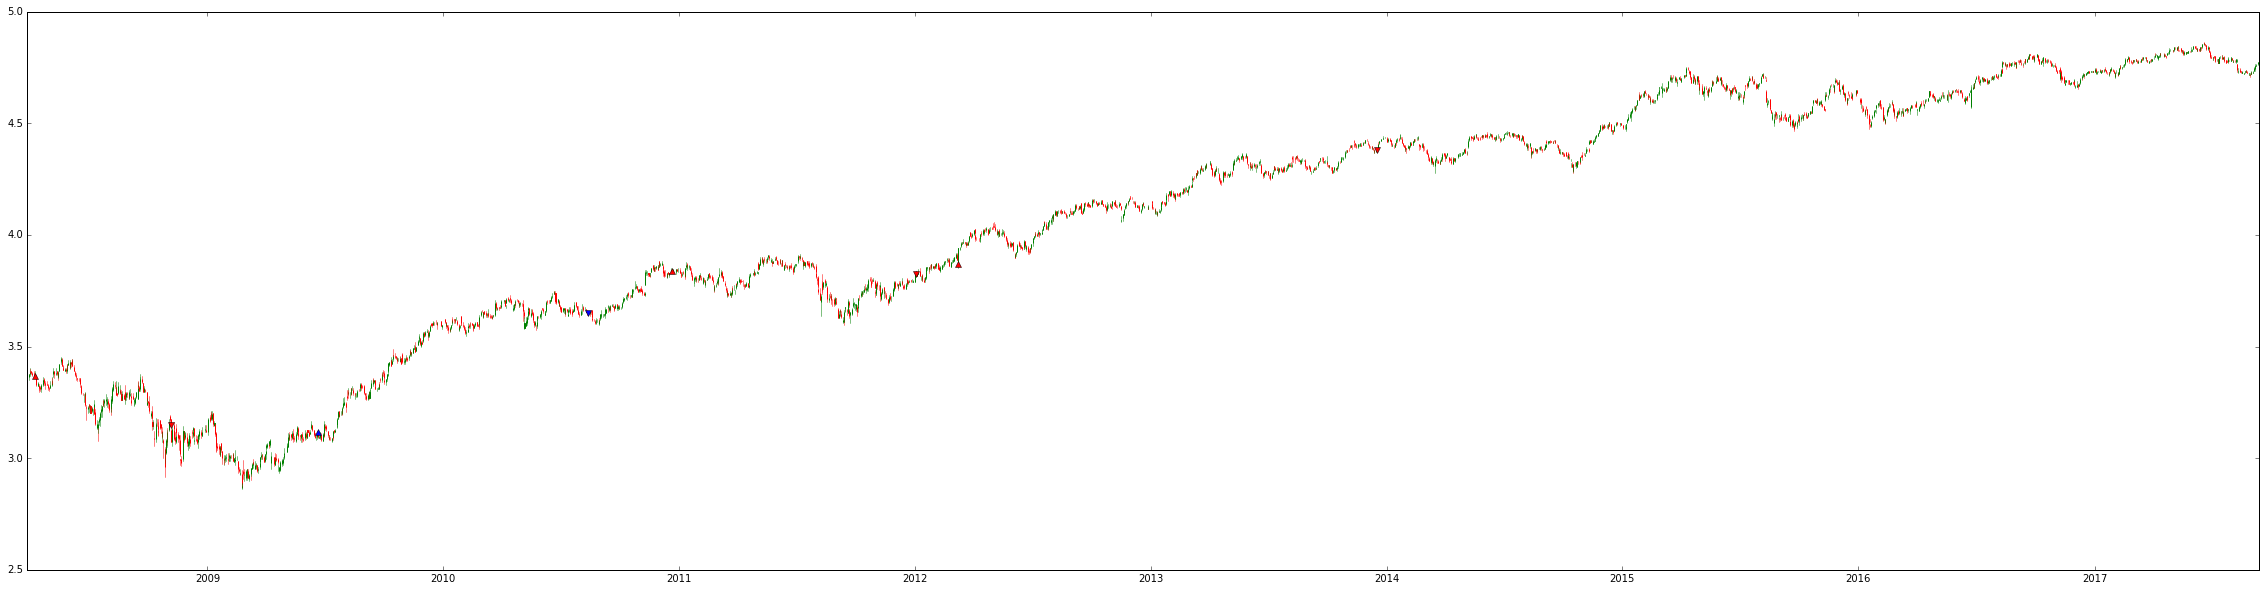

[ { 'Entry Price': 3.367295829986474,
    'Entry Time': Timestamp('2008-04-09 00:00:00'),
    'Exit Price': 3.1467351470905185,
    'Exit Time': Timestamp('2008-11-05 00:00:00'),
    'Profit': 0.22056068289595565,
    'Stock': 'HNKG',
    'Trade Duration': 149,
    'Type': 'SELL',
    'reward': 0.22056068289595565},
  { 'Entry Price': 3.1175073304799117,
    'Entry Time': Timestamp('2009-06-22 00:00:00'),
    'Exit Price': 3.6514371586380663,
    'Exit Time': Timestamp('2010-08-13 00:00:00'),
    'Profit': 0.5339298281581546,
    'Stock': 'HNKG',
    'Trade Duration': 294,
    'Type': 'BUY',
    'reward': 0.5339298281581546},
  { 'Entry Price': 3.839774841220522,
    'Entry Time': Timestamp('2010-12-22 00:00:00'),
    'Exit Price': 3.8234103470715426,
    'Exit Time': Timestamp('2012-01-03 00:00:00'),
    'Profit': 0.016364494148979336,
    'Stock': 'HNKG',
    'Trade Duration': 264,
    'Type': 'SELL',
    'reward': 0.016364494148979336},
  { 'Entry Price': 3.8691155044168695,
    'En

SUMMARY STATISTICS OF TEST
Total trades taken:  6
Total profit:  0.7141963354233254
Average profit per trade:  0.11903272257055424
Win ratio: 83.33333333333334 %
SUMMARY STATISTICS OF TEST
Total trades taken:  7
Total profit:  1.096290839195107
Average profit per trade:  0.1566129770278724
Win ratio: 57.14285714285714 %
SUMMARY STATISTICS OF TEST
Total trades taken:  8
Total profit:  0.911313023332899
Average profit per trade:  0.11391412791661237
Win ratio: 87.5 %
SUMMARY STATISTICS OF TEST
Total trades taken:  6
Total profit:  0.34477070121215947
Average profit per trade:  0.05746178353535991
Win ratio: 66.66666666666666 %
SUMMARY STATISTICS OF TEST
Total trades taken:  5
Total profit:  1.0942513287371707
Average profit per trade:  0.21885026574743413
Win ratio: 80.0 %
SUMMARY STATISTICS OF TEST
Total trades taken:  7
Total profit:  0.2189444302684036
Average profit per trade:  0.031277775752629085
Win ratio: 42.857142857142854 %
SUMMARY STATISTICS OF TEST
Total trades taken:  7
Tota

SUMMARY STATISTICS OF TEST
Total trades taken:  7
Total profit:  0.5573572403671037
Average profit per trade:  0.07962246290958623
Win ratio: 57.14285714285714 %
SUMMARY STATISTICS OF TEST
Total trades taken:  6
Total profit:  0.6945893403417003
Average profit per trade:  0.11576489005695005
Win ratio: 50.0 %
SUMMARY STATISTICS OF TEST
Total trades taken:  7
Total profit:  0.9739773157115623
Average profit per trade:  0.1391396165302232
Win ratio: 85.71428571428571 %
SUMMARY STATISTICS OF TEST
Total trades taken:  6
Total profit:  -1.9372932021316098
Average profit per trade:  -0.3228822003552683
Win ratio: 16.666666666666664 %
SUMMARY STATISTICS OF TEST
Total trades taken:  4
Total profit:  0.4817594233574889
Average profit per trade:  0.12043985583937222
Win ratio: 50.0 %
SUMMARY STATISTICS OF TEST
Total trades taken:  7
Total profit:  -0.36786600574333495
Average profit per trade:  -0.052552286534762134
Win ratio: 57.14285714285714 %
SUMMARY STATISTICS OF TEST
Total trades taken:  7

SUMMARY STATISTICS OF TEST
Total trades taken:  7
Total profit:  -0.12105845541936766
Average profit per trade:  -0.017294065059909665
Win ratio: 57.14285714285714 %
SUMMARY STATISTICS OF TEST
Total trades taken:  8
Total profit:  0.7818608440543162
Average profit per trade:  0.09773260550678953
Win ratio: 87.5 %
SUMMARY STATISTICS OF TEST
Total trades taken:  6
Total profit:  -1.3219292018767512
Average profit per trade:  -0.2203215336461252
Win ratio: 50.0 %
SUMMARY STATISTICS OF TEST
Total trades taken:  7
Total profit:  -0.21739606568954217
Average profit per trade:  -0.03105658081279174
Win ratio: 57.14285714285714 %
SUMMARY STATISTICS OF TEST
Total trades taken:  4
Total profit:  -0.6322279718312012
Average profit per trade:  -0.1580569929578003
Win ratio: 50.0 %
SUMMARY STATISTICS OF TEST
Total trades taken:  6
Total profit:  0.19380268368200637
Average profit per trade:  0.0323004472803344
Win ratio: 66.66666666666666 %
SUMMARY STATISTICS OF TEST
Total trades taken:  5
Total pr

In [14]:
actions_history = []
journals = []
with U.make_session(None):
    make_obs_ph = lambda name: U.BatchInput(env.observation_space.shape, name=name)
    act, train, update_target, debug = deepq.build_train(
        make_obs_ph=make_obs_ph,
        q_func=model,
        num_actions=env.action_space.n,
        optimizer=tf.train.AdamOptimizer(learning_rate=5e-4),
    )
    act_params = {'make_obs_ph': make_obs_ph,
                  'q_func': model,
                  'num_actions': env.action_space.n}
    act = deepq.simple.ActWrapper(act, act_params)

    replay_buffer = ReplayBuffer(50000)
    exploration = LinearSchedule(schedule_timesteps=10000, initial_p=1.0, final_p=0.02)

    # Initialize the parameters and copy them to the target network.
    U.initialize()
    update_target()

    episode_rewards = [0.0]
    obs = env.reset()
    mean_episode_reward = []
    for t in itertools.count():
        # Take action and update exploration to the newest value
        action = act(obs[None], update_eps=exploration.value(t))[0]
        actions_history.append(action)

        new_obs, rew, done, _ = env.step(action)

        # Store transition in the replay buffer.
        replay_buffer.add(obs, action, rew, new_obs, float(done))

        obs = new_obs

        episode_rewards[-1] += rew

        is_solved = np.mean(episode_rewards[-101:-1]) > 500 or t >= 6e6
        is_solved = is_solved and len(env.portfolio.journal) > 2
        
        if done:
            journal = pd.DataFrame(env.portfolio.journal)

            print("-------------------------------------")
            print("Steps                     | {:}".format(t))
            print("Episodes                  | {}".format(len(episode_rewards)))
            print("---")
            
            if len(journal) > 0:
                journal = journal[journal['Trade Duration'] != 0]
                journals.append(journal)
                profit = journal["Profit"].sum()

                mean_episode_reward.append(round(np.mean(episode_rewards[-101:-1]), 1))
                print("Mean episode reward       | {:}".format(mean_episode_reward[-1]))
                print("Total operations          | {}".format(len(journal)))
                print("Avg duration trades       | {}".format(round(journal["Trade Duration"].mean(), 2)))
                print("Total profit              | {}".format(round(profit), 1))
                print("Avg profit per trade      | {}".format(round(env.portfolio.average_profit_per_trade, 3)))
            else:
                print('No trades were taken')

            obs = env.reset()
            episode_rewards.append(0)

        if is_solved:
            # Show off the result
            env.generate_summary_stats(train=True,
                                       render_matplotlib=True,
                                       render_plotly=True,
                                       print_details=True)
            actions_history_test, journals_test = run_test(env, act, 180)
            act.save("DQN-{0}.pkl".format(strftime("%Y-%m-%d %H-%M-%S", gmtime())))
            break
        else:
            # Minimize the error in Bellman's equation on a batch sampled from replay buffer.
            if t > 50:
                obs_batch, act_batch, rew_batch, next_obs_batch, done_mask = replay_buffer.sample(32)
                train(obs_batch, act_batch, rew_batch, next_obs_batch, done_mask, np.ones_like(rew_batch))
            if t % 50 == 0:
                update_target()

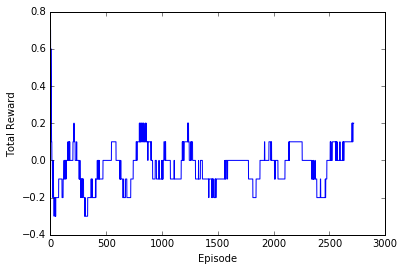

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(mean_episode_reward)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

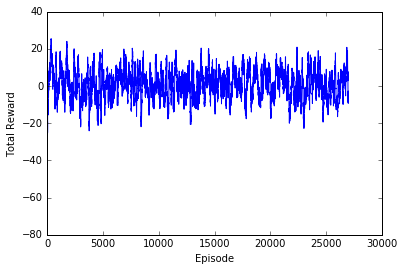

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(mean_episode_reward)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

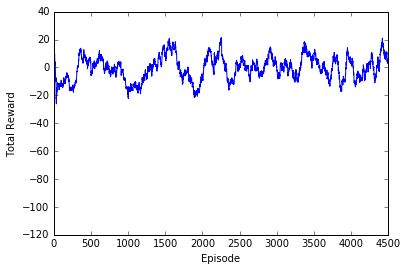

In [17]:
# 1e7
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(mean_episode_reward)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

In [16]:
journal_full_test = pd.concat(journals_test)

In [17]:
journal_full_test.describe()

,Entry Price,Exit Price,Profit,Trade Duration,reward
count,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000
mean,4.425926,4.468762,-0.004551,227.068308,-0.004551
std,1.779700,1.795957,0.325411,179.743405,0.325411
min,-0.353822,-0.359536,-2.037072,50.000000,-2.037072
25%,3.159338,3.183663,-0.158298,98.000000,-0.158298
50%,4.272351,4.297013,0.016763,173.000000,0.016763
75%,5.711751,5.757007,0.160656,299.000000,0.160656
max,8.948326,8.958669,1.897592,1362.000000,1.897592


In [28]:
journal_full_test.describe()

,Entry Price,Exit Price,Profit,Trade Duration,reward
count,1178.000000,1178.000000,1178.000000,1178.000000,1178.000000
mean,4.573803,4.617148,4.332518,179.484720,4.332518
std,1.814039,1.827936,26.579449,149.096572,26.579449
min,0.183987,0.178983,-200.327871,5.000000,-200.327871
25%,3.260024,3.302201,-5.906435,60.000000,-5.906435
50%,4.319983,4.348482,3.858054,132.000000,3.858054
75%,5.897640,5.963472,16.624730,268.750000,16.624730
max,9.010058,8.991562,167.425820,500.000000,167.425820


In [19]:
# 1e7
journal_full_test.describe()

,Entry Price,Exit Price,Profit,Trade Duration,reward
count,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000
mean,4.630243,4.669960,-4.078615,167.883106,-4.078615
std,1.835808,1.847741,26.441507,141.921845,26.441507
min,0.124305,0.137587,-141.349940,5.000000,-141.349940
25%,3.313458,3.352357,-15.415068,56.000000,-15.415068
50%,4.334935,4.397531,-4.760491,125.000000,-4.760491
75%,5.990819,6.021266,6.303911,241.000000,6.303911
max,8.935377,8.938925,203.033498,500.000000,203.033498


In [16]:
# random
journal_full_test.describe()

,Entry Price,Exit Price,Profit,Trade Duration,reward
count,23979.000000,23979.000000,23979.000000,23979.000000,23979.000000
mean,4.540455,4.542315,-0.005223,7.989074,-0.005223
std,1.813498,1.814163,5.858396,3.427813,5.858396
min,-0.048162,-0.071739,-73.270735,5.000000,-73.270735
25%,3.232744,3.234355,-2.865792,5.000000,-2.865792
50%,4.303331,4.307034,-0.000000,7.000000,-0.000000
75%,5.847305,5.849325,2.832964,9.000000,2.832964
max,9.130756,9.181426,68.178342,39.000000,68.178342


In [16]:
# B&H 500
journal_full_test.describe()

,Entry Price,Exit Price,Profit,Trade Duration,reward
count,97.000000,97.000000,97.000000,97.0,97.000000
mean,4.404467,4.395060,-0.940676,500.0,-0.940676
std,1.679187,1.708843,36.768366,0.0,36.768366
min,1.057324,0.999693,-211.253612,500.0,-211.253612
25%,3.078382,3.250374,-12.347607,500.0,-12.347607
50%,4.324133,4.171741,4.897130,500.0,4.897130
75%,5.631212,5.783989,18.515316,500.0,18.515316
max,8.106758,8.524169,91.331601,500.0,91.331601


In [16]:
# B&H
journal_full_test.describe()

,Entry Price,Exit Price,Profit,Trade Duration,reward
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4.351361,4.950722,59.936121,2278.630000,59.936121
std,1.686770,1.845765,85.782143,525.385105,85.782143
min,1.057324,0.565314,-246.720665,318.000000,-246.720665
25%,3.041168,3.766575,10.332812,2422.000000,10.332812
50%,4.316591,4.780160,62.449061,2436.000000,62.449061
75%,5.440322,6.189634,108.911591,2454.000000,108.911591
max,8.106758,8.957382,264.637533,2472.000000,264.637533


In [17]:
journal_full = pd.concat(journals)

In [30]:
journal_full.describe()

,Entry Price,Exit Price,Profit,Trade Duration,reward
count,5.002618e+06,5.002618e+06,5.002618e+06,5.002618e+06,5.002618e+06
mean,1.780985e+00,1.782487e+00,5.653227e-03,1.023519e+01,5.653227e-03
std,2.428058e+00,2.430147e+00,5.687706e+00,1.504448e+01,5.687706e+00
min,-1.224176e+00,-1.229291e+00,-3.316916e+02,5.000000e+00,-3.316916e+02
25%,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00
75%,3.761084e+00,3.763987e+00,0.000000e+00,9.000000e+00,0.000000e+00
max,1.122963e+01,1.123453e+01,2.834227e+02,5.000000e+02,2.834227e+02


In [21]:
# 1e7
journal_full.describe()

,Entry Price,Exit Price,Profit,Trade Duration,reward
count,688725.000000,688725.000000,688725.000000,688725.000000,688725.000000
mean,2.119702,2.121648,-0.003522,10.933955,-0.003522
std,2.482710,2.484988,6.449561,31.365263,6.449561
min,-1.152330,-1.157407,-291.664397,5.000000,-291.664397
25%,0.000000,0.000000,0.000000,5.000000,0.000000
50%,0.000000,0.000000,0.000000,5.000000,0.000000
75%,4.172848,4.176692,0.000000,5.000000,0.000000
max,11.223642,11.220164,296.464169,500.000000,296.464169


In [ ]:
# act = deepq.load("DQN-2018-07-06 23-43-26.pkl")

In [16]:
for df in env.sim.test_data:
    df['Open'] = df['Original Open']
    df['Close'] = df['Original Close']
    df['High'] = df['Original High']
    df['Low'] = df['Original Low']
real_test_actions, real_test_journals = run_test(env, actions_history_test, episodes=180)

SUMMARY STATISTICS OF TEST
Total trades taken:  8
Total profit:  -1.4700000000000166
Average profit per trade:  -0.18375000000000208
Win ratio: 62.5 %
SUMMARY STATISTICS OF TEST
Total trades taken:  7
Total profit:  -17.219334695347186
Average profit per trade:  -2.4599049564781694
Win ratio: 28.57142857142857 %
SUMMARY STATISTICS OF TEST
Total trades taken:  8
Total profit:  -211.64999999999998
Average profit per trade:  -26.456249999999997
Win ratio: 25.0 %
SUMMARY STATISTICS OF TEST
No trades were taken
SUMMARY STATISTICS OF TEST
Total trades taken:  7
Total profit:  34.77499999999999
Average profit per trade:  4.967857142857142
Win ratio: 57.14285714285714 %
SUMMARY STATISTICS OF TEST
Total trades taken:  6
Total profit:  1992.3262373100001
Average profit per trade:  332.054372885
Win ratio: 33.33333333333333 %
SUMMARY STATISTICS OF TEST
Total trades taken:  8
Total profit:  45.544169325
Average profit per trade:  5.693021165625
Win ratio: 50.0 %
SUMMARY STATISTICS OF TEST
Total tr

SUMMARY STATISTICS OF TEST
Total trades taken:  8
Total profit:  -1.7910000000000004
Average profit per trade:  -0.22387500000000005
Win ratio: 50.0 %
SUMMARY STATISTICS OF TEST
Total trades taken:  1
Total profit:  -13.068843717361801
Average profit per trade:  -13.068843717361801
Win ratio: 0.0 %
SUMMARY STATISTICS OF TEST
Total trades taken:  6
Total profit:  -338.587418253356
Average profit per trade:  -56.43123637555934
Win ratio: 16.666666666666664 %
SUMMARY STATISTICS OF TEST
Total trades taken:  8
Total profit:  29.350165824999994
Average profit per trade:  3.6687707281249993
Win ratio: 50.0 %
SUMMARY STATISTICS OF TEST
Total trades taken:  10
Total profit:  14.269206150000002
Average profit per trade:  1.4269206150000002
Win ratio: 40.0 %
SUMMARY STATISTICS OF TEST
Total trades taken:  6
Total profit:  -1.6175790335110003
Average profit per trade:  -0.26959650558516673
Win ratio: 66.66666666666666 %
SUMMARY STATISTICS OF TEST
Total trades taken:  8
Total profit:  362.313943003

SUMMARY STATISTICS OF TEST
Total trades taken:  6
Total profit:  10.055
Average profit per trade:  1.6758333333333333
Win ratio: 50.0 %
SUMMARY STATISTICS OF TEST
Total trades taken:  6
Total profit:  -32.750000000000014
Average profit per trade:  -5.458333333333336
Win ratio: 50.0 %
SUMMARY STATISTICS OF TEST
Total trades taken:  7
Total profit:  175.04999999999995
Average profit per trade:  25.00714285714285
Win ratio: 71.42857142857143 %
SUMMARY STATISTICS OF TEST
Total trades taken:  8
Total profit:  -322.91849999999994
Average profit per trade:  -40.36481249999999
Win ratio: 25.0 %
SUMMARY STATISTICS OF TEST
Total trades taken:  9
Total profit:  32.95
Average profit per trade:  3.6611111111111114
Win ratio: 77.77777777777779 %
SUMMARY STATISTICS OF TEST
Total trades taken:  6
Total profit:  12.180000000000007
Average profit per trade:  2.030000000000001
Win ratio: 66.66666666666666 %
SUMMARY STATISTICS OF TEST
Total trades taken:  8
Total profit:  10.538563259969948
Average profit

SUMMARY STATISTICS OF TEST
Total trades taken:  7
Total profit:  -120.35000000000002
Average profit per trade:  -17.192857142857147
Win ratio: 14.285714285714285 %
SUMMARY STATISTICS OF TEST
Total trades taken:  8
Total profit:  -18.830000000000005
Average profit per trade:  -2.3537500000000007
Win ratio: 37.5 %
SUMMARY STATISTICS OF TEST
Total trades taken:  4
Total profit:  741.0
Average profit per trade:  185.25
Win ratio: 50.0 %
SUMMARY STATISTICS OF TEST
Total trades taken:  8
Total profit:  -61.73885683580011
Average profit per trade:  -7.717357104475013
Win ratio: 50.0 %
SUMMARY STATISTICS OF TEST
Total trades taken:  7
Total profit:  -7.785000000000004
Average profit per trade:  -1.1121428571428578
Win ratio: 28.57142857142857 %
SUMMARY STATISTICS OF TEST
Total trades taken:  6
Total profit:  93.76870789571905
Average profit per trade:  15.628117982619841
Win ratio: 66.66666666666666 %
SUMMARY STATISTICS OF TEST
Total trades taken:  1
Total profit:  -46.0
Average profit per tra

In [22]:
# random (min 1, max 500)
overall = pd.concat(real_test_journals)
print('Total profit: {0}'.format(overall['Profit'].sum()))
overall.describe()

Total profit: 12329.43020145763


,Entry Price,Exit Price,Profit,Trade Duration,reward
count,76220.000000,76220.000000,76220.000000,76220.000000,76220.000000
mean,345.632885,346.134083,0.161761,3.862792,0.161761
std,811.049690,812.526389,34.270007,3.404495,34.270007
min,0.000000,0.000000,-2275.000000,1.000000,-2275.000000
25%,14.766560,14.789056,-1.000000,1.000000,-1.000000
50%,51.214760,51.299534,0.000000,3.000000,0.000000
75%,245.000000,244.600000,1.000000,5.000000,1.000000
max,9480.000000,9525.000000,1169.000000,37.000000,1169.000000


In [18]:
# B&H (min 1, max 500)
overall = pd.concat(real_test_journals)
print('Total profit: {0}'.format(overall['Profit'].sum()))
overall.describe()

Total profit: 1822.6014263167394


,Entry Price,Exit Price,Profit,Trade Duration,reward
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,284.467848,294.593412,10.125563,493.333333,10.125563
std,558.342435,626.103418,294.227723,41.907053,294.227723
min,1.320000,1.078000,-2468.966771,94.000000,-2468.966771
25%,21.635000,21.186869,-13.880505,500.000000,-13.880505
50%,64.920514,62.173235,0.099375,500.000000,0.099375
75%,285.875000,265.212500,9.700000,500.000000,9.700000
max,4295.740800,4937.000000,2577.000000,500.000000,2577.000000


In [18]:
# B&H (min 1, max inf)
overall = pd.concat(real_test_journals)
print('Total profit: {0}'.format(overall['Profit'].sum()))
overall.describe()

Total profit: 51573.26529247088


,Entry Price,Exit Price,Profit,Trade Duration,reward
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,284.467848,570.985989,286.518141,2249.961111,286.518141
std,558.342435,1256.410171,910.849000,500.327003,910.849000
min,1.320000,0.782000,-2639.266771,94.000000,-2639.266771
25%,21.635000,38.453750,4.570060,2376.000000,4.570060
50%,64.920514,117.150000,37.164215,2390.000000,37.164215
75%,285.875000,399.075000,122.107815,2405.000000,122.107815
max,4295.740800,7765.000000,5405.000000,2426.000000,5405.000000


In [19]:
# 32-64-128-64-32-16 relu 6e6 (min 50, max inf) lr=5e-4 rb=50000 exp=(10000, 1, 0.02) batch=32
overall = pd.concat(real_test_journals)
print('Total profit: {0}'.format(overall['Profit'].sum()))
overall.describe()

Total profit: 7109.147070471608


,Entry Price,Exit Price,Profit,Trade Duration,reward
count,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000
mean,368.339853,394.516093,4.374860,227.068308,4.374860
std,788.049425,857.288269,254.938108,179.743405,254.938108
min,0.702000,0.698000,-3081.000000,50.000000,-3081.000000
25%,23.555000,24.135000,-9.700000,98.000000,-9.700000
50%,71.690000,73.480000,0.449000,173.000000,0.449000
75%,302.400000,316.400000,11.750000,299.000000,11.750000
max,7695.000000,7775.000000,2960.000000,1362.000000,2960.000000


In [17]:
# (2) 32-64-128-64-32-16 relu 6e6 (min 50, max inf) lr=5e-4 rb=50000 exp=(200000, 1, 0.02) batch=32
overall = pd.concat(real_test_journals)
print('Total profit: {0}'.format(overall['Profit'].sum()))
overall.describe()

Total profit: 7247.382842558185


,Entry Price,Exit Price,Profit,Trade Duration,reward
count,7821.000000,7821.00000,7821.000000,7821.000000,7821.000000
mean,159.436693,160.72696,0.926657,50.015343,0.926657
std,587.235354,590.88081,54.460726,0.126004,54.460726
min,0.000000,0.00000,-1805.000000,50.000000,-1805.000000
25%,0.000000,0.00000,0.000000,50.000000,0.000000
50%,0.000000,0.00000,0.000000,50.000000,0.000000
75%,43.200000,43.90000,0.000000,50.000000,0.000000
max,7955.000000,7760.00000,1356.000000,52.000000,1356.000000


In [16]:
# (3) 64-128-32-16 relu 6e6 (min 50, max inf) lr=5e-4 rb=50000 exp=(10000, 1, 0.02) batch=64
overall = pd.concat(real_test_journals)
print('Total profit: {0}'.format(overall['Profit'].sum()))
overall.describe()

Total profit: -13325.394284660275


,Entry Price,Exit Price,Profit,Trade Duration,reward
count,5817.000000,5817.000000,5817.000000,5817.000000,5817.000000
mean,205.274371,209.274138,-2.290767,66.746433,-2.290767
std,686.684806,698.658067,81.266411,67.246468,81.266411
min,0.000000,0.000000,-2479.000000,50.000000,-2479.000000
25%,0.000000,0.000000,-0.475000,50.000000,-0.475000
50%,3.942015,3.970000,0.000000,50.000000,0.000000
75%,73.320000,74.982976,0.000000,50.000000,0.000000
max,9450.000000,9055.000000,2399.356600,1390.000000,2399.356600


In [17]:
# (4) 32-64-128-64-32-16 relu 6e6 (min 50, max inf) lr=5e-4 rb=50000 exp=(10000, 1, 0.02) batch=64
overall = pd.concat(real_test_journals)
print('Total profit: {0}'.format(overall['Profit'].sum()))
overall.describe()

Total profit: -34319.30479351183


,Entry Price,Exit Price,Profit,Trade Duration,reward
count,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000
mean,372.167769,398.321318,-21.721079,226.606962,-21.721079
std,796.926657,866.685270,256.991446,178.904741,256.991446
min,0.612000,0.698000,-2960.000000,50.000000,-2960.000000
25%,23.889772,24.386395,-16.500000,98.000000,-16.500000
50%,71.875000,73.365000,-1.462500,172.000000,-1.462500
75%,303.112133,318.512500,5.325621,298.000000,5.325621
max,7695.000000,7775.000000,3081.000000,1300.000000,3081.000000


In [17]:
# (5) 32-64-128-64-32-16 relu 6e6 (min 50, max inf) lr=5e-4 rb=50000 exp=(10000, 1, 0.02) batch=32
overall = pd.concat(real_test_journals)
print('Total profit: {0}'.format(overall['Profit'].sum()))
overall.describe()

Total profit: 11574.054085835605


,Entry Price,Exit Price,Profit,Trade Duration,reward
count,7636.000000,7636.000000,7636.000000,7636.000000,7636.000000
mean,171.646413,173.427884,1.515722,51.275013,1.515722
std,597.184089,603.989167,69.486905,13.927554,69.486905
min,0.000000,0.000000,-1805.000000,50.000000,-1805.000000
25%,0.000000,0.000000,0.000000,50.000000,0.000000
50%,0.000000,0.000000,0.000000,50.000000,0.000000
75%,57.057500,57.346153,0.000000,50.000000,0.000000
max,7955.000000,7760.000000,2115.000000,469.000000,2115.000000


In [17]:
# (6) 32-64-128-64-32-16 relu 6e6 (min 50, max inf) lr=5e-3 rb=50000 exp=(10000, 1, 0.02) batch=32
overall = pd.concat(real_test_journals)
print('Total profit: {0}'.format(overall['Profit'].sum()))
overall.describe()

Total profit: 7247.382842558185


,Entry Price,Exit Price,Profit,Trade Duration,reward
count,7821.000000,7821.00000,7821.000000,7821.000000,7821.000000
mean,159.436693,160.72696,0.926657,50.015343,0.926657
std,587.235354,590.88081,54.460726,0.126004,54.460726
min,0.000000,0.00000,-1805.000000,50.000000,-1805.000000
25%,0.000000,0.00000,0.000000,50.000000,0.000000
50%,0.000000,0.00000,0.000000,50.000000,0.000000
75%,43.200000,43.90000,0.000000,50.000000,0.000000
max,7955.000000,7760.00000,1356.000000,52.000000,1356.000000


In [18]:
# (7) train=100 32-64-128-64-32-16 relu 6e6 (min 50, max inf) lr=5e-3 rb=50000 exp=(10000, 1, 0.02) batch=32
overall = pd.concat(real_test_journals)
print('Total profit: {0}'.format(overall['Profit'].sum()))
overall.describe()

Total profit: 37892.3751170018


,Entry Price,Exit Price,Profit,Trade Duration,reward
count,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000
mean,368.339853,394.516093,23.318385,227.068308,23.318385
std,788.049425,857.288269,253.906495,179.743405,253.906495
min,0.702000,0.698000,-3081.000000,50.000000,-3081.000000
25%,23.555000,24.135000,-4.830000,98.000000,-4.830000
50%,71.690000,73.480000,1.770000,173.000000,1.770000
75%,302.400000,316.400000,17.000000,299.000000,17.000000
max,7695.000000,7775.000000,2960.000000,1362.000000,2960.000000


In [18]:
# (8) train=200 32-64-128-64-32-16 relu 6e6 (min 50, max inf) lr=5e-3 rb=50000 exp=(10000, 1, 0.02) batch=32
overall = pd.concat(real_test_journals)
print('Total profit: {0}'.format(overall['Profit'].sum()))
overall.describe()

Total profit: -37606.2766936399


,Entry Price,Exit Price,Profit,Trade Duration,reward
count,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000
mean,368.339853,394.516093,-23.142324,227.068308,-23.142324
std,788.049425,857.288269,253.922613,179.743405,253.922613
min,0.702000,0.698000,-2960.000000,50.000000,-2960.000000
25%,23.555000,24.135000,-16.950000,98.000000,-16.950000
50%,71.690000,73.480000,-1.729616,173.000000,-1.729616
75%,302.400000,316.400000,4.830000,299.000000,4.830000
max,7695.000000,7775.000000,3081.000000,1362.000000,3081.000000


In [18]:
# (9) train=50 32-64-128-64-32-16 relu 6e6 (min 50, max inf) lr=5e-3 rb=50000 exp=(10000, 1, 0.02) batch=32
overall = pd.concat(real_test_journals)
print('Total profit: {0}'.format(overall['Profit'].sum()))
overall.describe()

Total profit: -1477.6941665251916


,Entry Price,Exit Price,Profit,Trade Duration,reward
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,359.061811,391.333791,-1.292821,223.993001,-1.292821
std,751.753217,855.877128,248.778090,178.913568,248.778090
min,0.612000,0.698000,-3064.000000,50.000000,-3064.000000
25%,23.289517,24.587909,-9.510000,94.000000,-9.510000
50%,71.450000,73.600000,0.219000,168.000000,0.219000
75%,299.600000,305.089353,12.063977,293.500000,12.063977
max,5870.000000,7775.000000,2408.000000,1276.000000,2408.000000


In [17]:
# (10) 32-64-128-64-32-16 relu 6e6 (min 50, max inf) lr=5e-4 rb=50000 exp=(10000, 1, 0.02) batch=32 update_freq=1000
overall = pd.concat(real_test_journals)
print('Total profit: {0}'.format(overall['Profit'].sum()))
overall.describe()

Total profit: -18569.556913483997


,Entry Price,Exit Price,Profit,Trade Duration,reward
count,1493.000000,1493.000000,1493.000000,1493.000000,1493.000000
mean,376.110047,401.999791,-12.437747,225.779638,-12.437747
std,812.023356,882.369923,261.683149,177.583912,261.683149
min,0.612000,0.698000,-2960.000000,50.000000,-2960.000000
25%,24.000000,25.000000,-14.090000,99.000000,-14.090000
50%,72.134383,74.410000,-0.928000,172.000000,-0.928000
75%,298.200000,304.144561,7.500000,298.000000,7.500000
max,7695.000000,7775.000000,3081.000000,1288.000000,3081.000000


In [17]:
# (11) 32-64-128-64-32-16 relu 6e6 (min 50, max inf) lr=5e-4 rb=50000 exp=(10000, 1, 0.02) batch=32 update_freq=100
overall = pd.concat(real_test_journals)
print('Total profit: {0}'.format(overall['Profit'].sum()))
overall.describe()

Total profit: 25814.71259193501


,Entry Price,Exit Price,Profit,Trade Duration,reward
count,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000
mean,375.526823,401.591004,17.371947,225.905787,17.371947
std,811.824485,882.575541,261.659414,178.017505,261.659414
min,0.612000,0.698000,-3081.000000,50.000000,-3081.000000
25%,24.153159,25.155000,-5.510000,99.000000,-5.510000
50%,72.419793,74.830000,1.268882,172.000000,1.268882
75%,297.400000,303.778629,15.620000,297.750000,15.620000
max,7695.000000,7775.000000,2960.000000,1285.000000,2960.000000


In [17]:
# (12) 32-64-128-64-32-16 relu 6e6 (min 50, max inf) lr=5e-4 rb=50000 exp=(10000, 1, 0.02) batch=32 update_freq=50
overall = pd.concat(real_test_journals)
print('Total profit: {0}'.format(overall['Profit'].sum()))
overall.describe()

Total profit: 37892.3751170018


,Entry Price,Exit Price,Profit,Trade Duration,reward
count,1625.000000,1625.000000,1625.000000,1625.000000,1625.000000
mean,368.339853,394.516093,23.318385,227.068308,23.318385
std,788.049425,857.288269,253.906495,179.743405,253.906495
min,0.702000,0.698000,-3081.000000,50.000000,-3081.000000
25%,23.555000,24.135000,-4.830000,98.000000,-4.830000
50%,71.690000,73.480000,1.770000,173.000000,1.770000
75%,302.400000,316.400000,17.000000,299.000000,17.000000
max,7695.000000,7775.000000,2960.000000,1362.000000,2960.000000


In [17]:
# (13) 32-64-128-64-32-16 relu 6e6 (min 50, max 700) lr=5e-4 rb=50000 exp=(10000, 1, 0.02) batch=32 update_freq=50
overall = pd.concat(real_test_journals)
print('Total profit: {0}'.format(overall['Profit'].sum()))
overall.describe()

Total profit: -1457.6734549412677


,Entry Price,Exit Price,Profit,Trade Duration,reward
count,1158.000000,1158.000000,1158.000000,1158.000000,1158.000000
mean,362.314211,394.356043,-1.258785,219.962003,-1.258785
std,754.249547,856.810756,245.016961,161.138726,245.016961
min,0.612000,0.698000,-3064.000000,50.000000,-3064.000000
25%,23.284275,24.581863,-9.748723,94.000000,-9.748723
50%,72.373178,74.725000,0.205765,169.000000,0.205765
75%,302.325993,305.484030,12.106989,294.000000,12.106989
max,5870.000000,7775.000000,2408.000000,700.000000,2408.000000
